# ANALYSIS ON WORLD HAPPINESS INDEX OF LAST 5 YEARS

## Introduction

    The concept of Happiness indexing was inspired by Gross National Happiness introduced by the 4th king of Bhutan, Jigme Singye Wangchuk. The first World Happiness Index Report was released on April, 2012. The ranking is based on Cantril Ladder Survey from the representative sample of each participating nation.
    There are 6 factors affecting the Happiness Score. Those are Gross Domestic Product(GDP) per capita of a country, Social Support, Healthy Life Expectency, Freedom of Life Choice, Generosity, Absence of Corruption. There can be many factors determining the happiness as it is subjective, so the remaining factors affecting the Happiness score is termed as Unexplained Happiness. However, In this analysis we only take those six factors.
    World Happiness Report of past five years from 2018 to 2022 are taken for analysis. We are going to clean the data extract some insights regarding the countries perfromance, correlation, India's performance, trends and patterns.
    Lets get into this.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Opening the file


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statistics import *

In [3]:
rdf2017 = pd.read_csv('2017.csv')
rdf2018 = pd.read_csv('2018.csv')
rdf2019 = pd.read_csv('2019.csv')
rdf2020 = pd.read_csv('2020.csv')
rdf2021 = pd.read_csv('2021.csv')
rdf2022 = pd.read_csv('2022.csv')


## Data cleaning

### 1) Detecting the null values

In [4]:
rdf2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [5]:
rdf2018.isna().sum()


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [6]:
rdf2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
rdf2020.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [8]:
rdf2021.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [9]:
rdf2022.isna().sum()

RANK                                          0
Country                                       0
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64

There are null values in 2022 dataset and in 2018 dataset.

### 2) Dropping null values, Deleting unnecessary columns, Renaming columns, Validating the values:

In [10]:
a = rdf2022.dropna()
x = a.drop(['Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual'], axis = 1)
y = x.rename(columns = {'RANK': 'Rank',
                         'Happiness score': 'Score', 
                         'Explained by: GDP per capita': 'GDP',
                         'Explained by: Social support': 'Social support', 
                         'Explained by: Healthy life expectancy': 'Lifexp', 
                         'Explained by: Freedom to make life choices': 'Lifechoice',
                         'Explained by: Generosity': 'Generosity',
                         'Explained by: Perceptions of corruption': 'Corruptionpercep'})
dotcomma = y.replace(',', '.', regex = True)
df2022 = dotcomma.replace("\*", "", regex = True)
df2022

,Rank,Country,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
0,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...
141,142,Botswana,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


We replace all the commas with dots as it should be and the * symbol is removed. Unnecessary columns were deleted and columns were renamed.

In [11]:
dropcol = rdf2021.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',  'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'], axis  = 1)
df2021 = dropcol.rename(columns = {'Ladder score': 'Score',
                                   'Country name': 'Country',
                         'Explained by: Log GDP per capita': 'GDP',
                         'Explained by: Social support': 'Social support', 
                         'Explained by: Healthy life expectancy': 'Lifexp', 
                         'Explained by: Freedom to make life choices': 'Lifechoice',
                         'Explained by: Generosity': 'Generosity',
                         'Explained by: Perceptions of corruption': 'Corruptionpercep'})
df2021.insert(0, 'Rank', [i for i in range(1,len(df2021.values)+1)])
df2021

,Rank,Country,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
0,1,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481
1,2,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485
2,3,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413
3,4,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170
4,5,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384
...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,3.512,0.451,0.731,0.007,0.405,0.103,0.015
145,146,Botswana,3.467,1.099,0.724,0.340,0.539,0.027,0.088
146,147,Rwanda,3.415,0.364,0.202,0.407,0.627,0.227,0.493
147,148,Zimbabwe,3.145,0.457,0.649,0.243,0.359,0.157,0.075


We modified and simplified the 2021 data by deleting unnecessary columns and renaming columns.

In [12]:
dropcol = rdf2020.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',  'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'], axis  = 1)
df2020 = dropcol.rename(columns = {'Ladder score': 'Score', 
                                   'Country name': 'Country',
                         'Explained by: Log GDP per capita': 'GDP',
                         'Explained by: Social support': 'Social support', 
                         'Explained by: Healthy life expectancy': 'Lifexp', 
                         'Explained by: Freedom to make life choices': 'Lifechoice',
                         'Explained by: Generosity': 'Generosity',
                         'Explained by: Perceptions of corruption': 'Corruptionpercep'})
df2020.insert(0, 'Rank', [i for i in range(1, len(df2020.values)+1)])
df2020

,Rank,Country,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
0,1,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,2,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,3,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,4,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,5,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


We modified and simplified the 2020 data by deleting unnecessary columns and renaming columns.

In [13]:

df2019 = rdf2019.rename(columns = {'Country or region': 'Country',
                                   'Overall rank': 'Rank',
                                   'GDP per capita': 'GDP',
                         'Social support': 'Social support', 
                         'Healthy life expectancy': 'Lifexp', 
                         'Freedom to make life choices': 'Lifechoice',
                         'Generosity': 'Generosity',
                         'Perceptions of corruption': 'Corruptionpercep'})
df2019

,Rank,Country,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


We modified and simplified the 2019 data by deleting unnecessary columns and renaming columns.

In [14]:
df2018 = rdf2018.rename(columns = {'Country or region': 'Country',
                                   'Overall rank': 'Rank',
                                   'GDP per capita': 'GDP',
                         'Social support': 'Social support', 
                         'Healthy life expectancy': 'Lifexp', 
                         'Freedom to make life choices': 'Lifechoice',
                         'Generosity': 'Generosity',
                         'Perceptions of corruption': 'Corruptionpercep'})
df2018

,Rank,Country,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


We modified and simplified the 2018 data by deleting unnecessary columns and renaming columns.

### 3) Replacing the null value:

In [15]:
uaecor = mean([df2019._get_value(int(df2019[df2019['Country']== 'United Arab Emirates'].index[0]), col = 'Corruptionpercep'),rdf2017.set_index('Country').at['United Arab Emirates', 'Trust..Government.Corruption.']])

In [16]:
df2018.fillna(round(uaecor, 3), inplace = True)

In [17]:
df2018.loc[(df2018['Country']== 'United Arab Emirates'), 'Corruptionpercep']

19    0.253
Name: Corruptionpercep, dtype: float64

In 2018 data, there is a null value for the country UAE in Perception of Corruption. But, it is presented in all other year data sets. To replace the null value, we find the mean value of UAE's corruption perception in the previous year(2017) and the next year(2019) and substitute it in the place of Null value.

### 4) Selecting the countries participated in all 5 years:

In [18]:
df1920 = pd.merge(df2019['Country'], df2020['Country'], how = 'inner', on = 'Country')
df2122 = pd.merge(df2021['Country'], df2022['Country'], how = 'inner', on = 'Country')
df9012 = pd.merge(df2122['Country'], df1920['Country'], how = 'inner', on = 'Country')
dfnew = df2018.merge(df9012['Country'], how = 'inner', on = 'Country')
dfnew['Country']

0          Finland
1           Norway
2          Denmark
3          Iceland
4      Switzerland
          ...     
132         Malawi
133        Liberia
134         Rwanda
135          Yemen
136       Tanzania
Name: Country, Length: 137, dtype: object

We used the inner join to merge the countries to find the countries that participated in all 5 years from 2018 to 2022. There are 137 countries participated in all 5 years of World Happiness Index. 

#### Cross checking:

In [19]:
countries = list(df2022['Country']) + list(df2021['Country']) + list(df2020['Country']) + list(df2019['Country']) + list(df2018['Country'])
unik = set(countries)
print(len(unik))

168


There are totally 168 countries participated.

In [20]:
passed = []
failed = []
for i in countries:
    if countries.count(i) == 5:
        passed.append(i)
    else:
        failed.append(i)
ogcountries = set(passed) 
print(ogcountries, len(ogcountries))

{'Kyrgyzstan', 'Botswana', 'Singapore', 'Russia', 'Yemen', 'China', 'Burkina Faso', 'Afghanistan', 'Nicaragua', 'Namibia', 'Guatemala', 'India', 'Ireland', 'Japan', 'Italy', 'Mozambique', 'Kenya', 'Denmark', 'Albania', 'Liberia', 'Bolivia', 'Morocco', 'Portugal', 'Montenegro', 'Malawi', 'Myanmar', 'Ecuador', 'Uruguay', 'Chad', 'Bulgaria', 'Tunisia', 'Moldova', 'Latvia', 'Dominican Republic', 'Lesotho', 'Lebanon', 'Ethiopia', 'Venezuela', 'Chile', 'Thailand', 'Romania', 'Tajikistan', 'Germany', 'Panama', 'Brazil', 'Kuwait', 'Georgia', 'Turkmenistan', 'Mexico', 'El Salvador', 'Switzerland', 'Belarus', 'Honduras', 'Argentina', 'Colombia', 'Uganda', 'Poland', 'Cyprus', 'Sri Lanka', 'Ghana', 'United Kingdom', 'Saudi Arabia', 'Iraq', 'Tanzania', 'Egypt', 'Vietnam', 'Mali', 'Turkey', 'Uzbekistan', 'Australia', 'Bosnia and Herzegovina', 'Ukraine', 'Sweden', 'Hungary', 'United States', 'Iran', 'Finland', 'Togo', 'Spain', 'Guinea', 'Mauritania', 'Zimbabwe', 'Philippines', 'Algeria', 'South Afric

The above 137 countries are paricipated in all 5 years.

In [21]:
og = set(dfnew['Country'])
if og == ogcountries:
    print(og - ogcountries)
    print(ogcountries - og)

set()
set()


So, It is clear that there is no difference between the countries derived from inner join and countries derived from crosschecking. Out of 168 total countries, 137 countries are participated in all 5 years(from 2018 to 2022) of World Happinss Index.  

### 5) Removing the countries that are not participated in all 5 years:

In [22]:
h18 = df2018[df2018['Country'].isin(ogcountries)]
h18.index = [i for i in range(1,138)]
h19 = df2019[df2019['Country'].isin(ogcountries)]
h19.index = [i for i in range(1,138)]
h20 = df2020[df2020['Country'].isin(ogcountries)]
h20.index = [i for i in range(1,138)]
h21 = df2021[df2021['Country'].isin(ogcountries)]
h21.index = [i for i in range(1,138)]
h22 = df2022[df2022['Country'].isin(ogcountries)]
h22.index = [i for i in range(1,138)]

In [23]:
print(h18.dtypes, h19.dtypes, h20.dtypes, h21.dtypes, h22.dtypes)

Rank                  int64
Country              object
Score               float64
GDP                 float64
Social support      float64
Lifexp              float64
Lifechoice          float64
Generosity          float64
Corruptionpercep    float64
dtype: object Rank                  int64
Country              object
Score               float64
GDP                 float64
Social support      float64
Lifexp              float64
Lifechoice          float64
Generosity          float64
Corruptionpercep    float64
dtype: object Rank                  int64
Country              object
Score               float64
GDP                 float64
Social support      float64
Lifexp              float64
Lifechoice          float64
Generosity          float64
Corruptionpercep    float64
dtype: object Rank                  int64
Country              object
Score               float64
GDP                 float64
Social support      float64
Lifexp              float64
Lifechoice          float64
Genero

In [24]:
h22[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']] = h22[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].apply(pd.to_numeric)

Now all 5 year Datasests are cleaned and ready for analysing and extracting the insights.

## What the datasets are saying

### Distributions:

Text(0.5, 1.0, '2022')

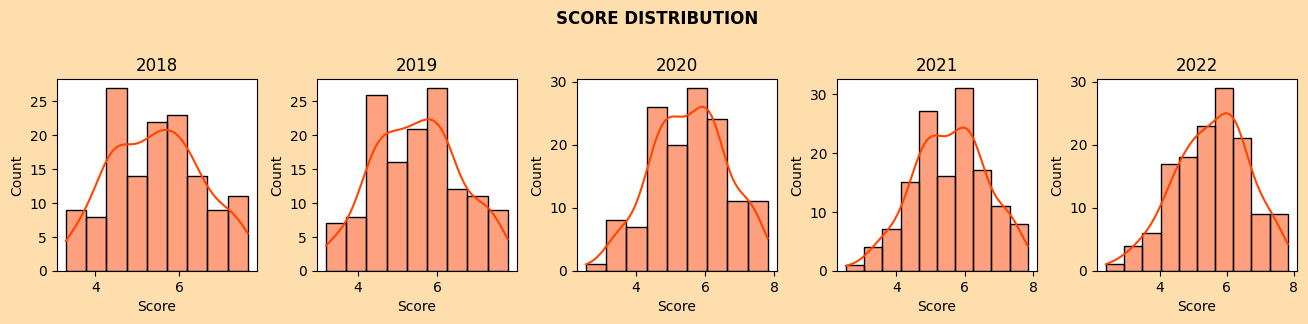

In [25]:
plt.figure(figsize=(16,3), facecolor = 'navajowhite')
plt.suptitle('SCORE DISTRIBUTION', fontweight = 'bold')

plt.subplot(151)
sb.histplot(h18.Score, color = 'orangered', kde = True)
plt.title('2018')
plt.subplots_adjust(wspace = 0.3, top = 0.75)

plt.subplot(152)
sb.histplot(h19.Score, color = 'orangered', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20.Score, color = 'orangered', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21.Score, color = 'orangered', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22.Score, color = 'orangered', kde= True)
plt.title('2022')


Scores distribution more like Normal distribution.

Text(0.5, 1.0, '2022')

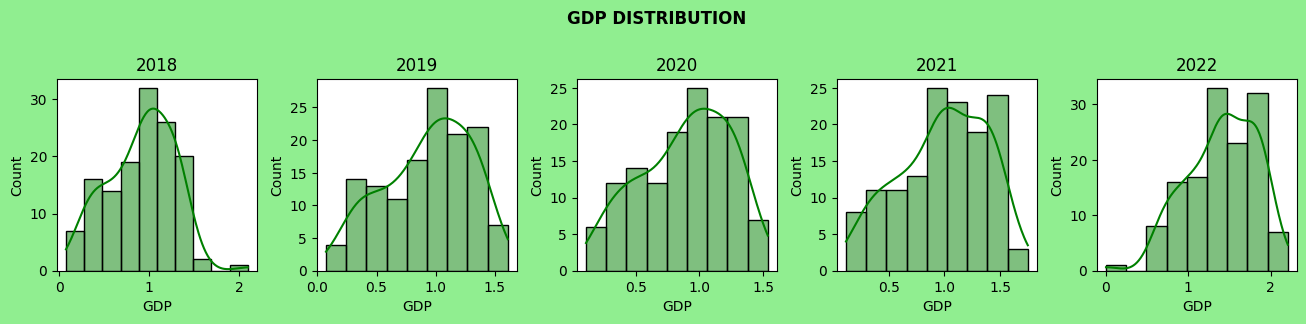

In [26]:
plt.figure(figsize=(16,3), facecolor = 'lightgreen')
plt.suptitle('GDP DISTRIBUTION', fontweight = 'bold')

plt.subplot(151)
sb.histplot(h18.GDP, color = 'g', kde = True)
plt.title('2018')
plt.subplots_adjust(wspace = 0.3, top = 0.75)

plt.subplot(152)
sb.histplot(h19.GDP, color = 'g', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20.GDP, color = 'g', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21.GDP, color = 'g', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22.GDP, color = 'g', kde= True)
plt.title('2022')


GDP distribution graphs are left skewed.

Text(0.5, 1.0, '2022')

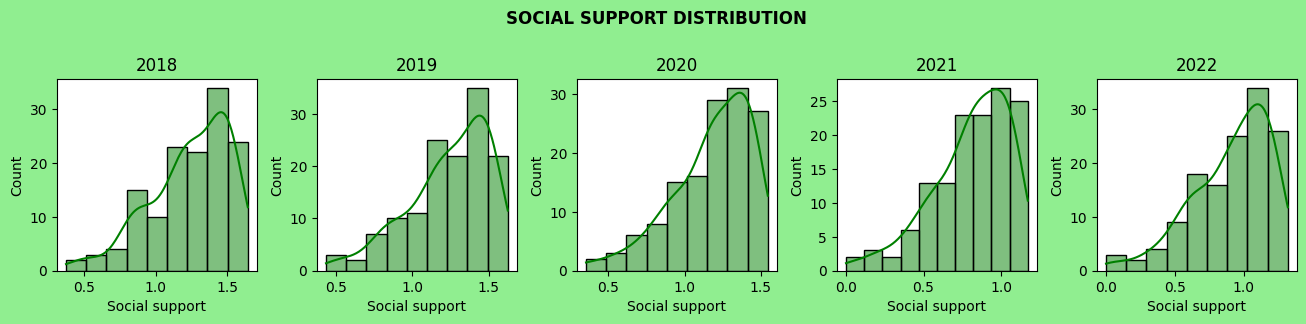

In [27]:
plt.figure(figsize=(16,3), facecolor = 'lightgreen')
plt.suptitle('SOCIAL SUPPORT DISTRIBUTION', fontweight = 'bold')
plt.subplots_adjust(top = 0.75, wspace = 0.3)

plt.subplot(151)
sb.histplot(h18['Social support'], color = 'g', kde = True)
plt.title('2018')

plt.subplot(152)
sb.histplot(h19['Social support'], color = 'g', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20['Social support'], color = 'g', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21['Social support'], color = 'g', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22['Social support'], color = 'g', kde= True)
plt.title('2022')


Social Support distributions are clearly left skewed.

Text(0.5, 1.0, '2022')

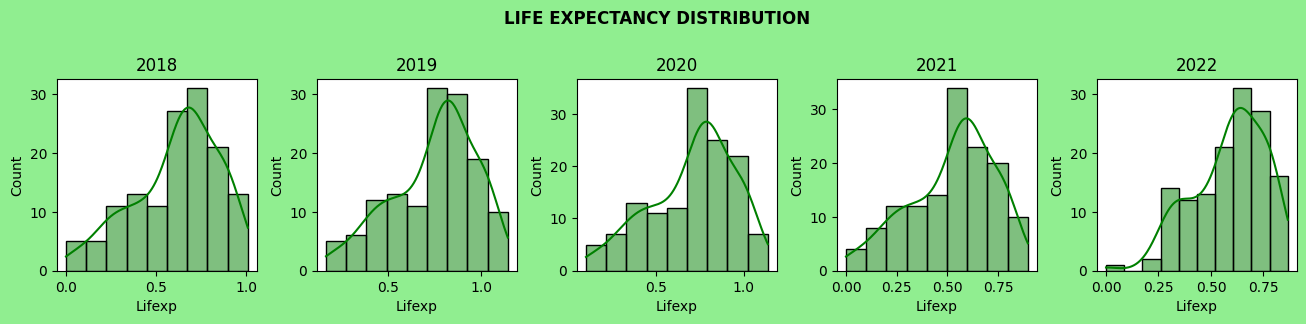

In [28]:
plt.figure(figsize=(16,3), facecolor = 'lightgreen')
plt.suptitle('LIFE EXPECTANCY DISTRIBUTION', fontweight = 'bold')
plt.subplots_adjust(top = 0.75, wspace = 0.3)

plt.subplot(151)
sb.histplot(h18.Lifexp, color = 'g', kde = True)
plt.title('2018')

plt.subplot(152)
sb.histplot(h19.Lifexp, color = 'g', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20.Lifexp, color = 'g', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21.Lifexp, color = 'g', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22.Lifexp, color = 'g', kde= True)
plt.title('2022')


Life Expectancy distributions are left skewed.

Text(0.5, 1.0, '2022')

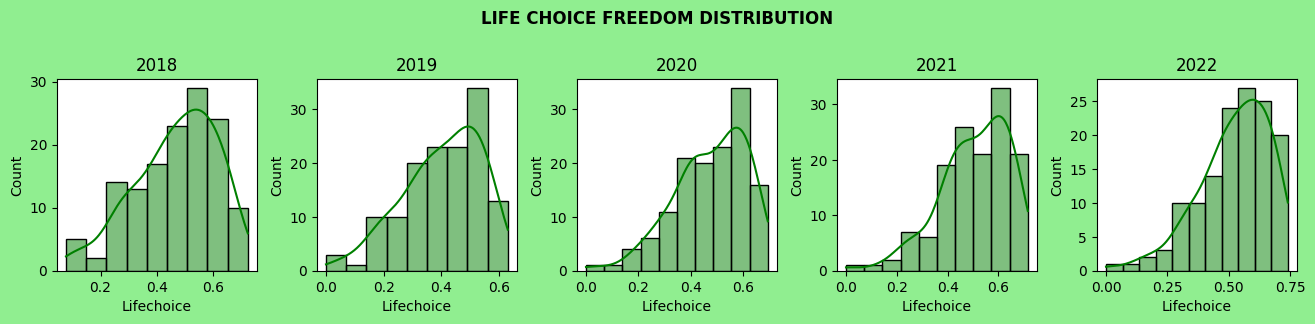

In [29]:
plt.figure(figsize=(16,3), facecolor = 'lightgreen')
plt.suptitle('LIFE CHOICE FREEDOM DISTRIBUTION', fontweight = 'bold')
plt.subplots_adjust(top = 0.75, wspace = 0.3)

plt.subplot(151)
sb.histplot(h18.Lifechoice, color = 'g', kde = True)
plt.title('2018')

plt.subplot(152)
sb.histplot(h19.Lifechoice, color = 'g', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20.Lifechoice, color = 'g', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21.Lifechoice, color = 'g', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22.Lifechoice, color = 'g', kde= True)
plt.title('2022')


Life choice distributions are also left skewed.

Text(0.5, 1.0, '2022')

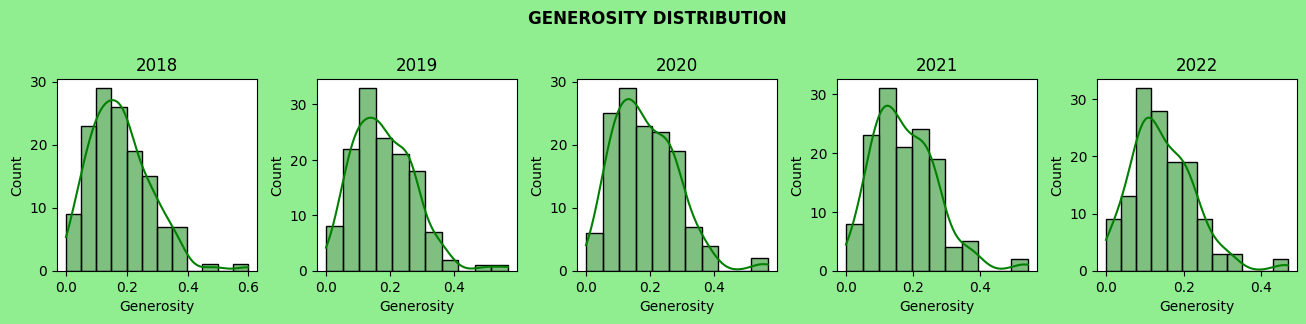

In [30]:
plt.figure(figsize=(16,3), facecolor = 'lightgreen')
plt.suptitle('GENEROSITY DISTRIBUTION', fontweight = 'bold')
plt.subplots_adjust(top = 0.75, wspace = 0.3)

plt.subplot(151)
sb.histplot(h18.Generosity, color = 'g', kde = True)
plt.title('2018')

plt.subplot(152)
sb.histplot(h19.Generosity, color = 'g', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20.Generosity, color = 'g', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21.Generosity, color = 'g', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22.Generosity, color = 'g', kde= True)
plt.title('2022')


Unlike other factors distribution, Generosity distributions are normal and has little skewness towards right.

Text(0.5, 1.0, '2022')

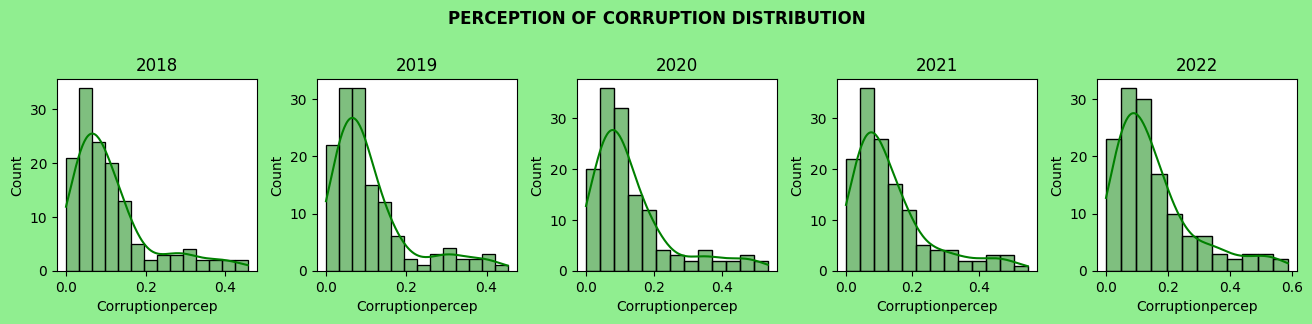

In [31]:
plt.figure(figsize=(16,3), facecolor = 'lightgreen')
plt.suptitle('PERCEPTION OF CORRUPTION DISTRIBUTION', fontweight = 'bold')
plt.subplots_adjust(top = 0.75, wspace = 0.3)

plt.subplot(151)
sb.histplot(h18.Corruptionpercep, color = 'g', kde = True)
plt.title('2018')

plt.subplot(152)
sb.histplot(h19.Corruptionpercep, color = 'g', kde = True)
plt.title('2019')

plt.subplot(153)
sb.histplot(h20.Corruptionpercep, color = 'g', kde = True)
plt.title('2020')

plt.subplot(154)
sb.histplot(h21.Corruptionpercep, color = 'g', kde = True)
plt.title('2021')

plt.subplot(155)
sb.histplot(h22.Corruptionpercep, color = 'g', kde= True)
plt.title('2022')

Perception of Corruption distributions are also like Generosity distributions. Right skewed.

### Yearwise distribution:

Text(0.5, 1.0, '2018 Perception of Corruption')

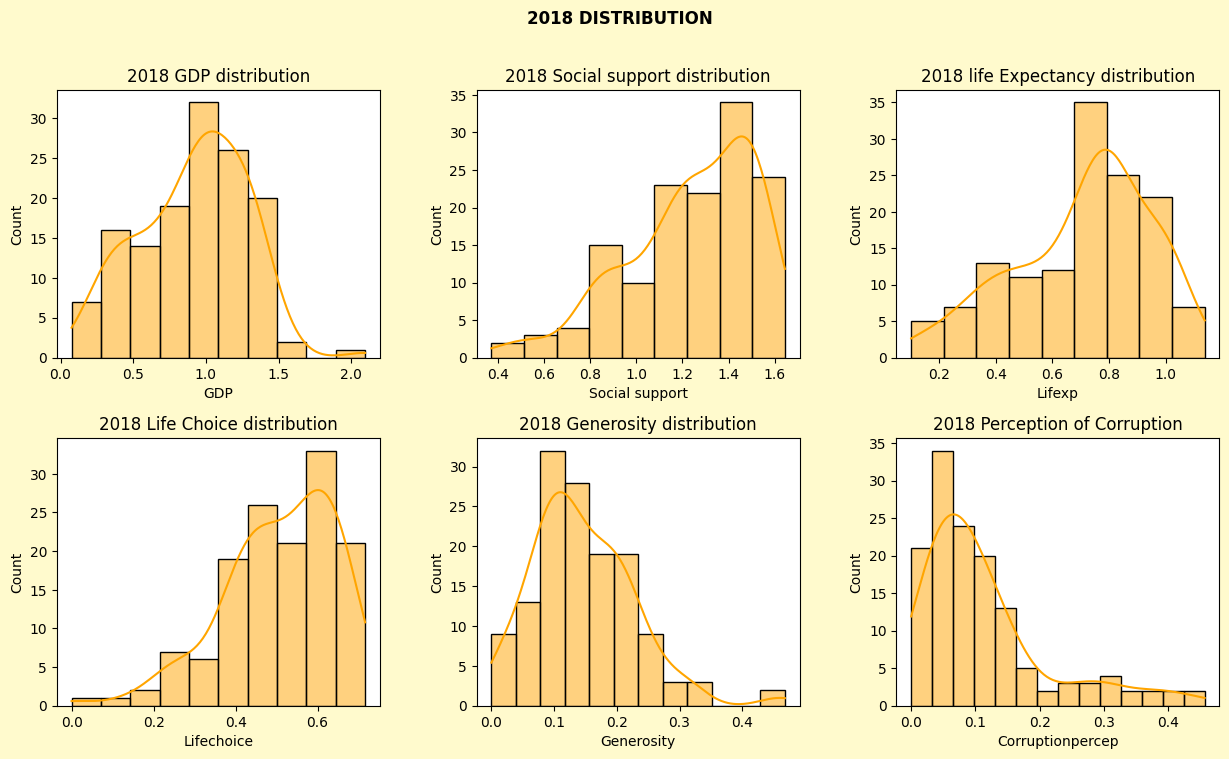

In [32]:
plt.figure(figsize=(15,8), facecolor = 'lemonchiffon')
plt.suptitle('2018 DISTRIBUTION', fontweight = 'bold')


plt.subplot(231)
sb.histplot(h18.GDP, color = 'orange', kde = True)
plt.title('2018 GDP distribution')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(232)
sb.histplot(h18['Social support'], color = 'orange', kde = True)
plt.title('2018 Social support distribution')

plt.subplot(233)
sb.histplot(h20.Lifexp, color = 'orange', kde = True)
plt.title('2018 life Expectancy distribution')

plt.subplot(234)
sb.histplot(h21.Lifechoice, color = 'orange', kde = True)
plt.title('2018 Life Choice distribution')

plt.subplot(235)
sb.histplot(h22.Generosity, color = 'orange', kde= True)
plt.title('2018 Generosity distribution')

plt.subplot(236)
sb.histplot(h18.Corruptionpercep, color = 'orange', kde = True)
plt.title('2018 Perception of Corruption')

Text(0.5, 1.0, '2019 Perception of Corruption')

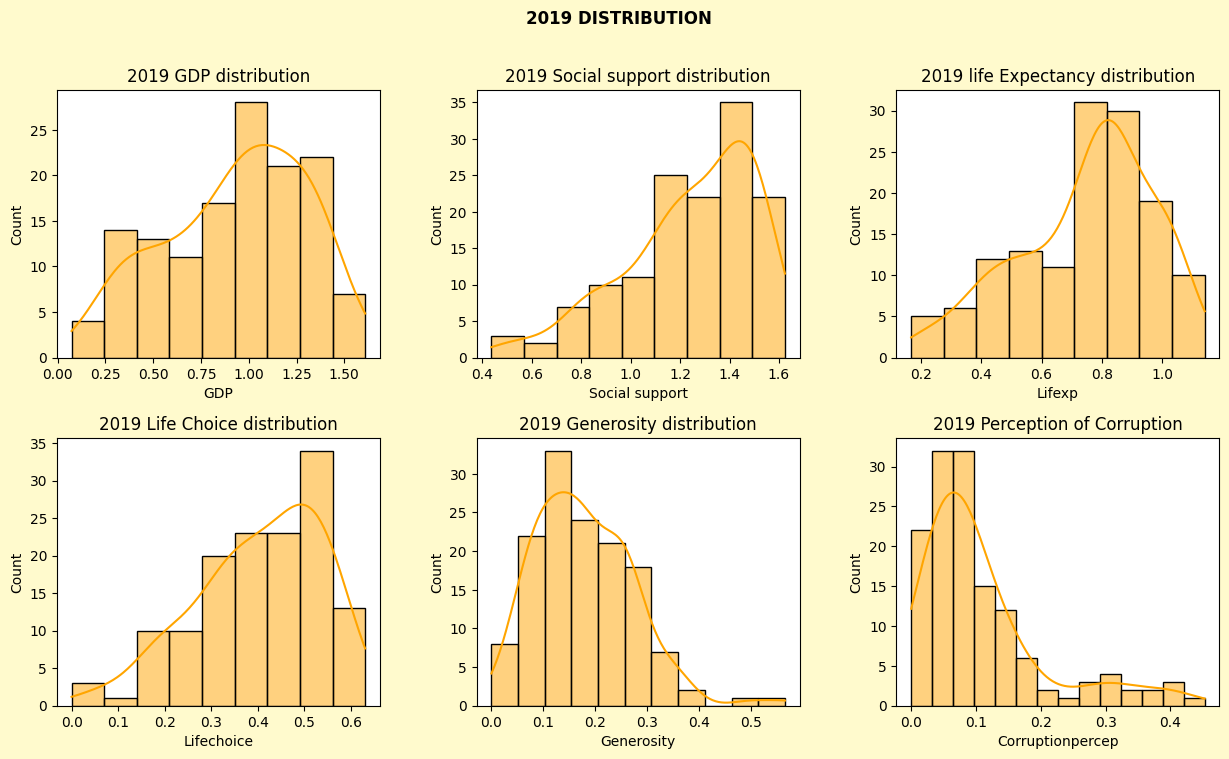

In [33]:
plt.figure(figsize=(15,8), facecolor = 'lemonchiffon')
plt.suptitle('2019 DISTRIBUTION', fontweight = 'bold')

plt.subplot(231)
sb.histplot(h19.GDP, color = 'orange', kde = True)
plt.title('2019 GDP distribution')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(232)
sb.histplot(h19['Social support'], color = 'orange', kde = True)
plt.title('2019 Social support distribution')

plt.subplot(233)
sb.histplot(h19.Lifexp, color = 'orange', kde = True)
plt.title('2019 life Expectancy distribution')

plt.subplot(234)
sb.histplot(h19.Lifechoice, color = 'orange', kde = True)
plt.title('2019 Life Choice distribution')

plt.subplot(235)
sb.histplot(h19.Generosity, color = 'orange', kde= True)
plt.title('2019 Generosity distribution')

plt.subplot(236)
sb.histplot(h19.Corruptionpercep, color = 'orange', kde = True)
plt.title('2019 Perception of Corruption')

Text(0.5, 1.0, '2020 Perception of Corruption')

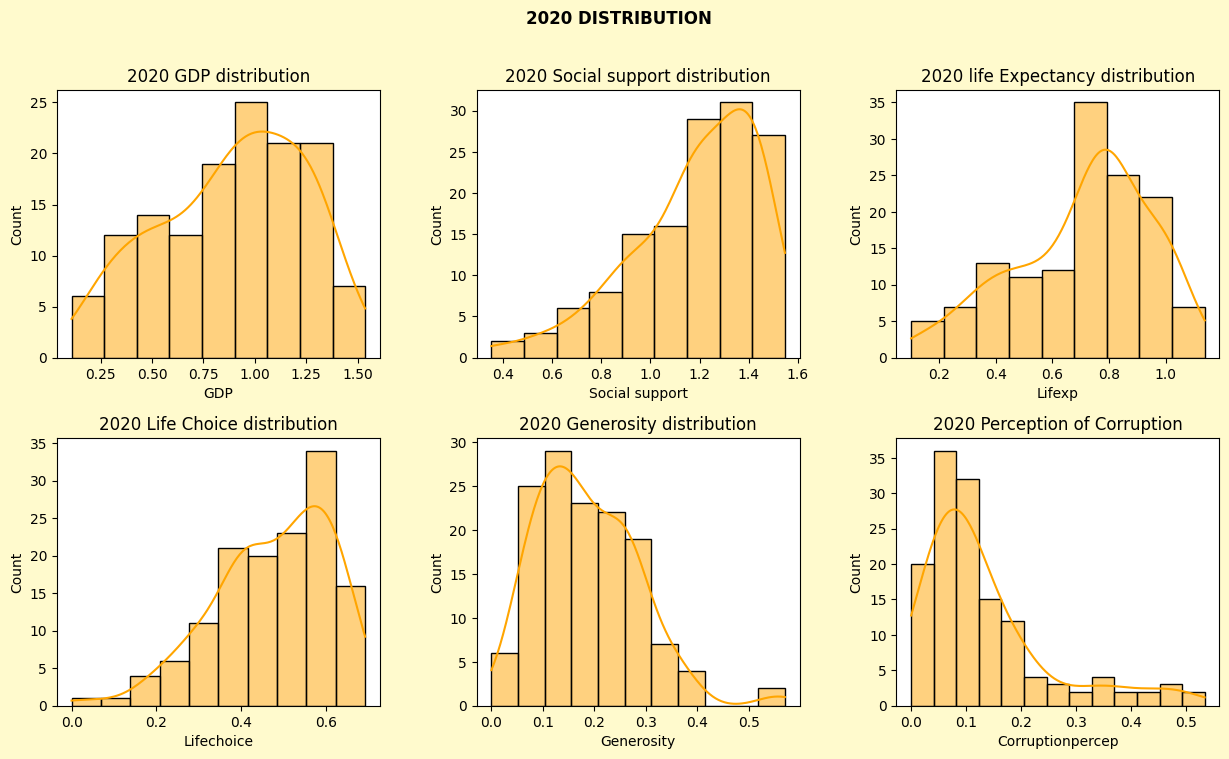

In [34]:
plt.figure(figsize=(15,8), facecolor = 'lemonchiffon')
plt.suptitle('2020 DISTRIBUTION', fontweight = 'bold')

plt.subplot(231)
sb.histplot(h20.GDP, color = 'orange', kde = True)
plt.title('2020 GDP distribution')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(232)
sb.histplot(h20['Social support'], color = 'orange', kde = True)
plt.title('2020 Social support distribution')

plt.subplot(233)
sb.histplot(h20.Lifexp, color = 'orange', kde = True)
plt.title('2020 life Expectancy distribution')

plt.subplot(234)
sb.histplot(h20.Lifechoice, color = 'orange', kde = True)
plt.title('2020 Life Choice distribution')

plt.subplot(235)
sb.histplot(h20.Generosity, color = 'orange', kde= True)
plt.title('2020 Generosity distribution')

plt.subplot(236)
sb.histplot(h20.Corruptionpercep, color = 'orange', kde = True)
plt.title('2020 Perception of Corruption')

Text(0.5, 1.0, '2021 Perception of Corruption')

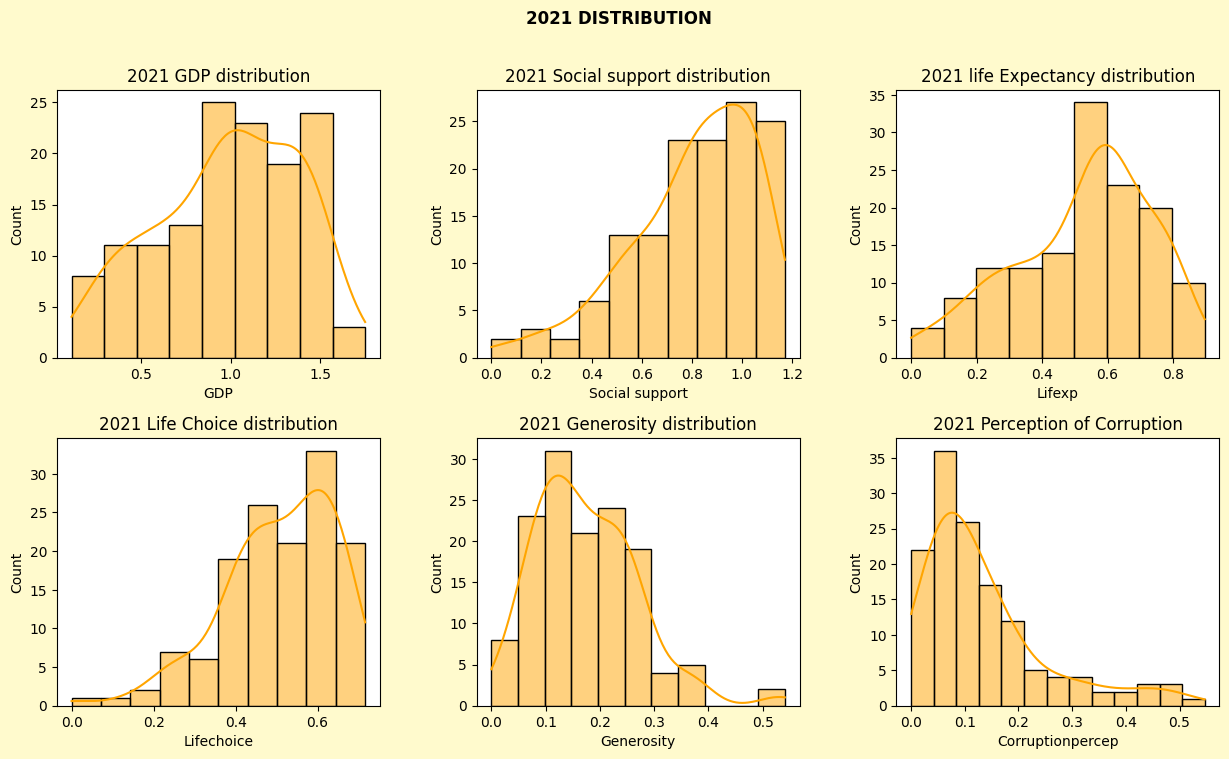

In [35]:
plt.figure(figsize=(15,8), facecolor = 'lemonchiffon')
plt.suptitle('2021 DISTRIBUTION', fontweight = 'bold')

plt.subplot(231)
sb.histplot(h21.GDP, color = 'orange', kde = True)
plt.title('2021 GDP distribution')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(232)
sb.histplot(h21['Social support'], color = 'orange', kde = True)
plt.title('2021 Social support distribution')

plt.subplot(233)
sb.histplot(h21.Lifexp, color = 'orange', kde = True)
plt.title('2021 life Expectancy distribution')

plt.subplot(234)
sb.histplot(h21.Lifechoice, color = 'orange', kde = True)
plt.title('2021 Life Choice distribution')

plt.subplot(235)
sb.histplot(h21.Generosity, color = 'orange', kde= True)
plt.title('2021 Generosity distribution')

plt.subplot(236)
sb.histplot(h21.Corruptionpercep, color = 'orange', kde = True)
plt.title('2021 Perception of Corruption')


Text(0.5, 1.0, '2022 Perception of Corruption')

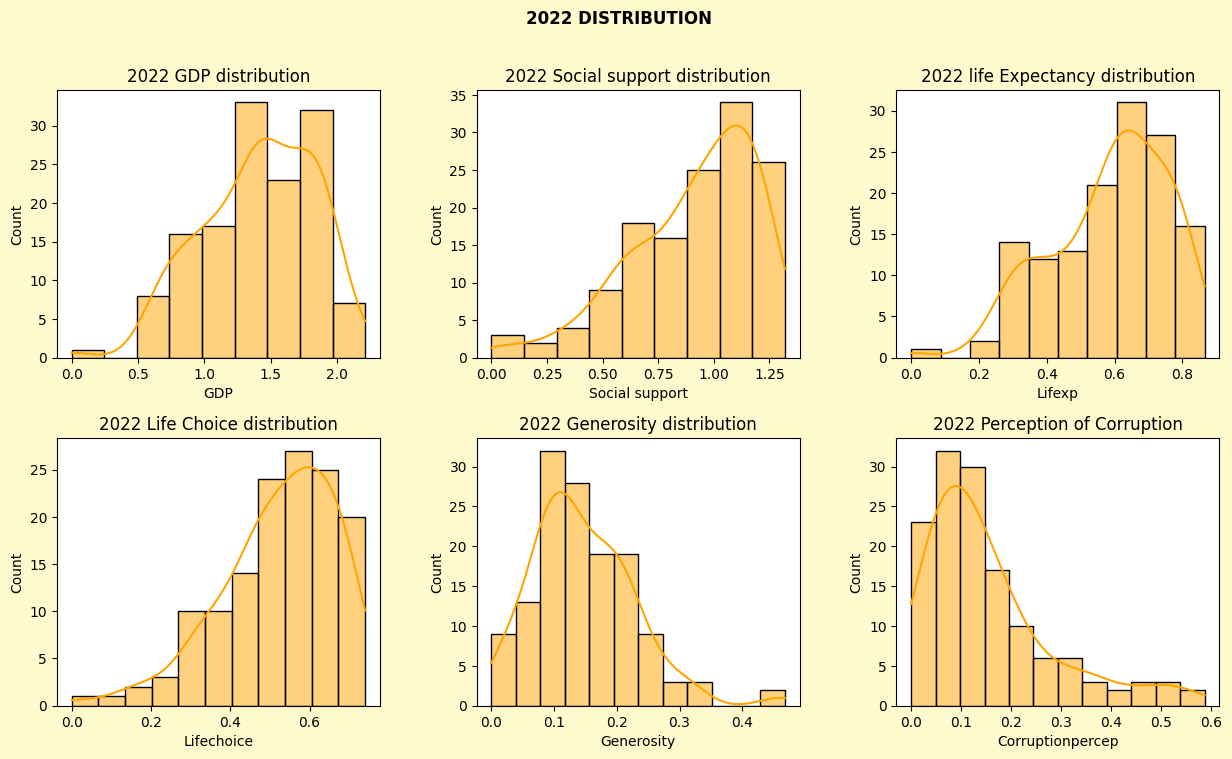

In [36]:
plt.figure(figsize=(15,8), facecolor = 'lemonchiffon')
plt.suptitle('2022 DISTRIBUTION', fontweight = 'bold')

plt.subplot(231)
sb.histplot(h22.GDP, color = 'orange', kde = True)
plt.title('2022 GDP distribution')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.subplot(232)
sb.histplot(h22['Social support'], color = 'orange', kde = True)
plt.title('2022 Social support distribution')

plt.subplot(233)
sb.histplot(h22.Lifexp, color = 'orange', kde = True)
plt.title('2022 life Expectancy distribution')

plt.subplot(234)
sb.histplot(h22.Lifechoice, color = 'orange', kde = True)
plt.title('2022 Life Choice distribution')

plt.subplot(235)
sb.histplot(h22.Generosity, color = 'orange', kde= True)
plt.title('2022 Generosity distribution')

plt.subplot(236)
sb.histplot(h22.Corruptionpercep, color = 'orange', kde = True)
plt.title('2022 Perception of Corruption')

### Which among the six factors largely affects the Happiness score (Correlation):

Text(0.5, 1.0, 'Perception of Corruption')

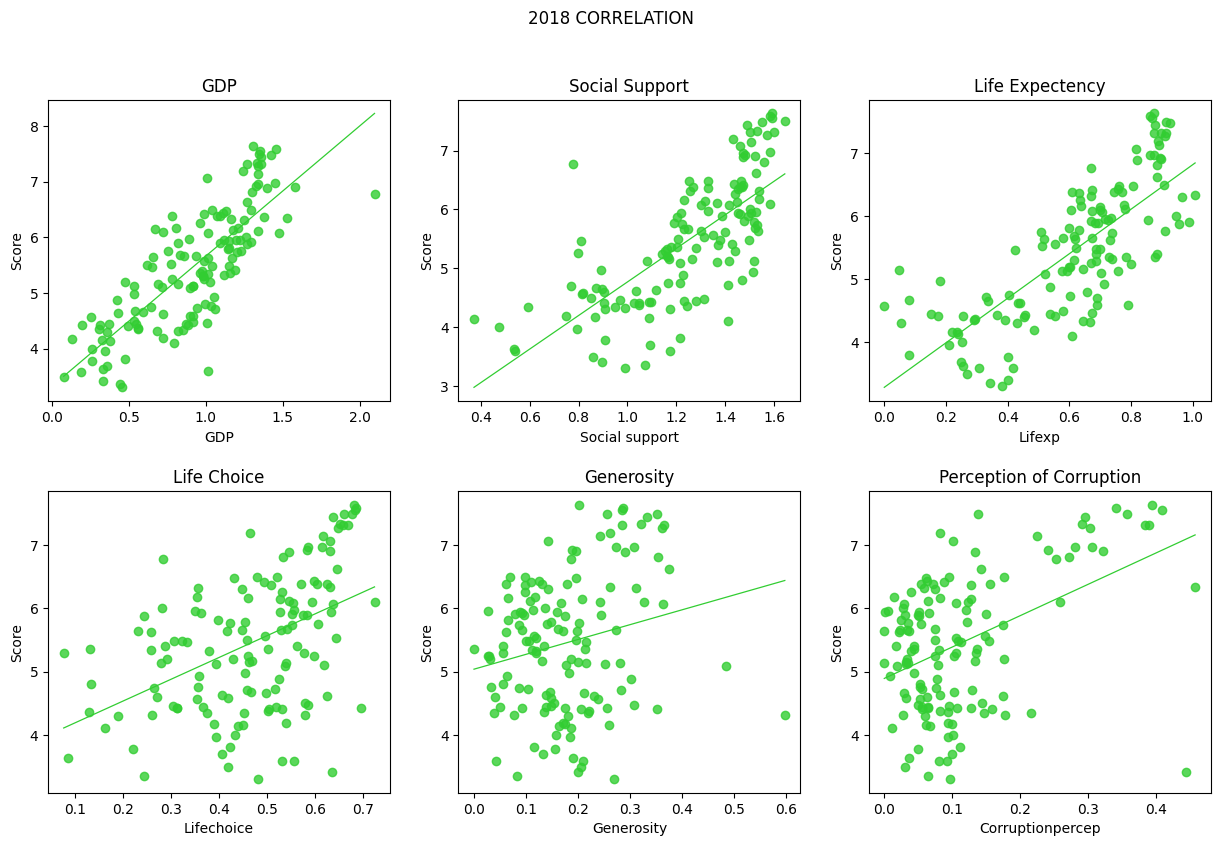

In [37]:
plt.figure(figsize=(15,9))
plt.suptitle("2018 CORRELATION")
plt.subplots_adjust(hspace = 0.3)

plt.subplot(231)
sb.regplot(x = h18.GDP, y = h18.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('GDP')

plt.subplot(232)
sb.regplot(x = h18['Social support'], y = h18.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Social Support')

plt.subplot(233)
sb.regplot(x = h18.Lifexp, y = h18.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Expectency')

plt.subplot(234)
sb.regplot(x = h18.Lifechoice, y = h18.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Choice')

plt.subplot(235)
sb.regplot(x = h18.Generosity, y = h18.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Generosity')

plt.subplot(236)
sb.regplot(x = h18.Corruptionpercep, y = h18.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Perception of Corruption')

In 2018 data set, GDP per capita, Life Expectency has positive linear relationship pattern.

Text(0.5, 1.0, 'Perception of Corruption')

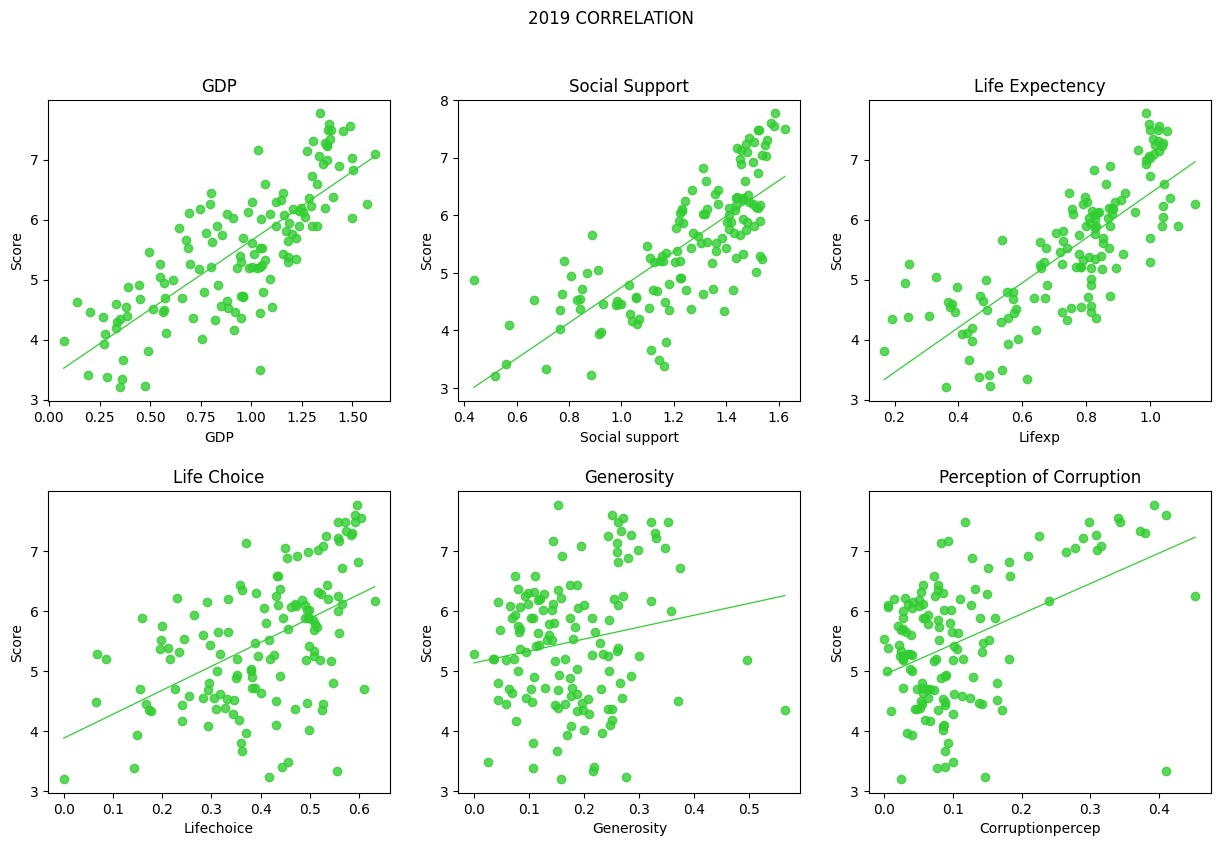

In [38]:
plt.figure(figsize=(15,9))
plt.suptitle("2019 CORRELATION")
plt.subplots_adjust(hspace = 0.3)

plt.subplot(231)
sb.regplot(x = h19.GDP, y = h19.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('GDP')

plt.subplot(232)
sb.regplot(x = h19['Social support'], y = h19.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Social Support')

plt.subplot(233)
sb.regplot(x = h19.Lifexp, y = h19.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Expectency')

plt.subplot(234)
sb.regplot(x = h19.Lifechoice, y = h19.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Choice')

plt.subplot(235)
sb.regplot(x = h19.Generosity, y = h19.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Generosity')

plt.subplot(236)
sb.regplot(x = h19.Corruptionpercep, y = h19.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Perception of Corruption')

In 2019 data set, GDP per capita, Social Support, Life Expectency shows positive linear relationship pattern.

Text(0.5, 1.0, 'Perception of Corruption')

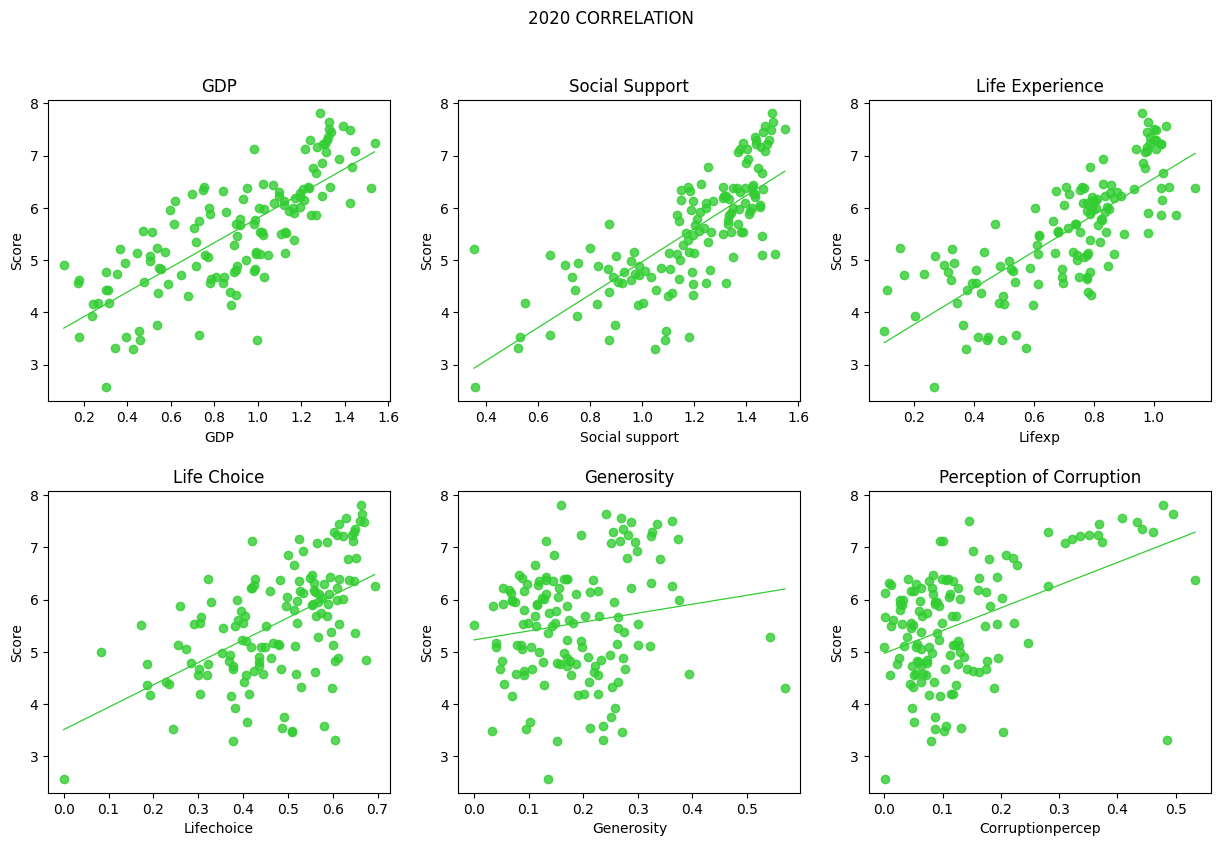

In [39]:
plt.figure(figsize=(15,9))
plt.suptitle("2020 CORRELATION")
plt.subplots_adjust(hspace = 0.3)

plt.subplot(231)
sb.regplot(x = h20.GDP, y = h20.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('GDP')

plt.subplot(232)
sb.regplot(x = h20['Social support'], y = h20.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Social Support')

plt.subplot(233)
sb.regplot(x = h20.Lifexp, y = h20.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Experience')

plt.subplot(234)
sb.regplot(x = h20.Lifechoice, y = h20.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Choice')

plt.subplot(235)
sb.regplot(x = h20.Generosity, y = h20.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Generosity')

plt.subplot(236)
sb.regplot(x = h20.Corruptionpercep, y = h20.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Perception of Corruption')

In 2020 data set, GDP per capita, Social Support and Life Expectency has positive linear relationship pattern.

Text(0.5, 1.0, 'Perception of corruption')

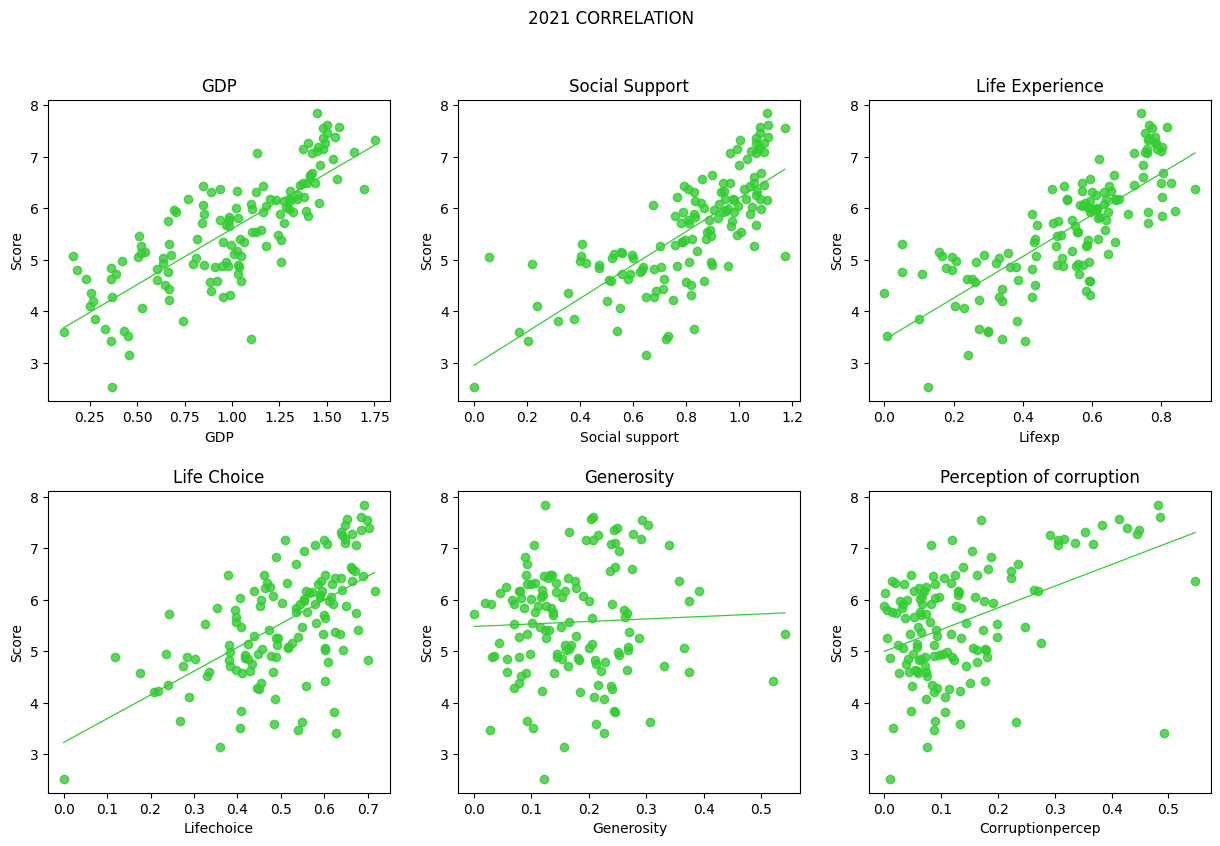

In [40]:
plt.figure(figsize=(15,9))
plt.suptitle("2021 CORRELATION")
plt.subplots_adjust(hspace = 0.3)

plt.subplot(231)
sb.regplot(x = h21.GDP, y = h21.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('GDP')

plt.subplot(232)
sb.regplot(x = h21['Social support'], y = h21.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Social Support')

plt.subplot(233)
sb.regplot(x = h21.Lifexp, y = h21.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Experience')

plt.subplot(234)
sb.regplot(x = h21.Lifechoice, y = h21.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Choice')

plt.subplot(235)
sb.regplot(x = h21.Generosity, y = h21.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Generosity')

plt.subplot(236)
sb.regplot(x = h21.Corruptionpercep, y = h21.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Perception of corruption')

In 2021 data set, GDP per capita, Social Support and Life Expectency has positive linear relationship pattern.

Text(0.5, 1.0, 'Perception of Corruption')

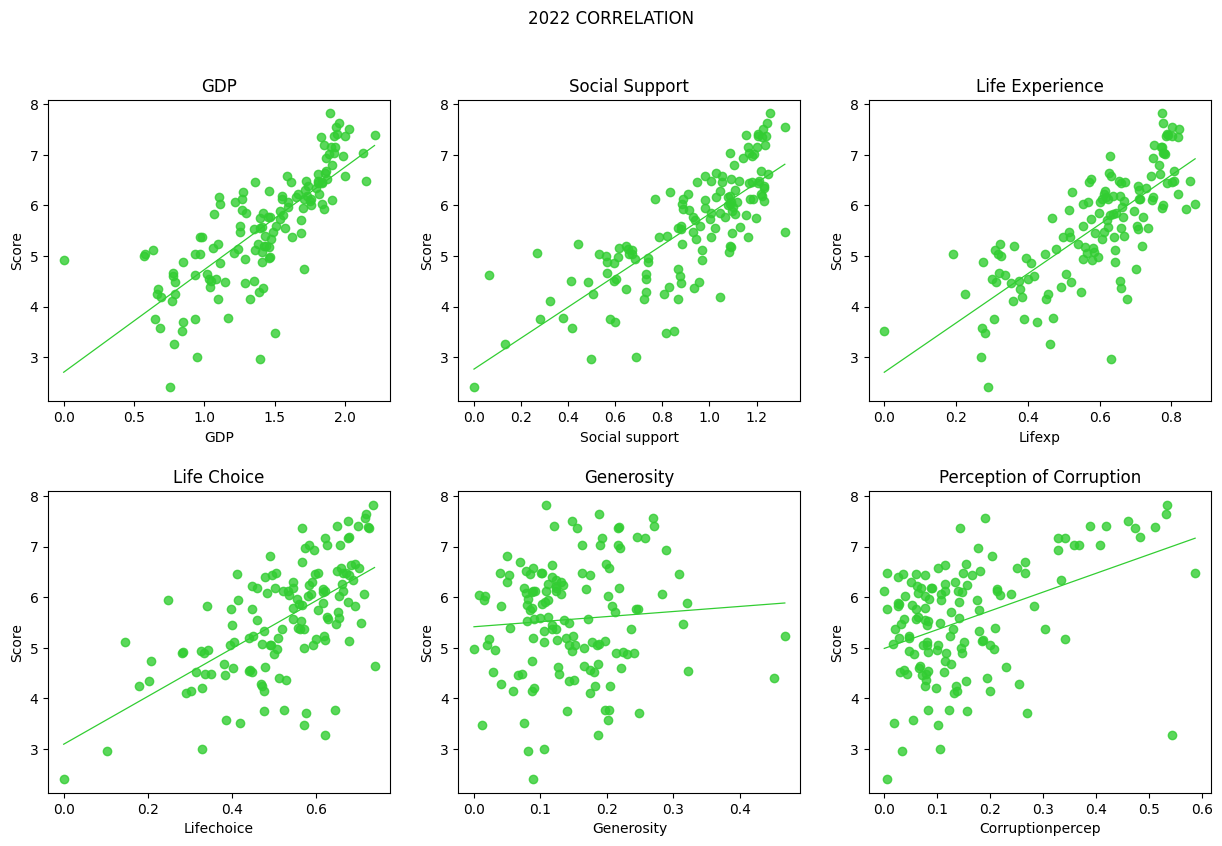

In [41]:
plt.figure(figsize=(15,9))
plt.suptitle("2022 CORRELATION")
plt.subplots_adjust(hspace = 0.3)

plt.subplot(231)
sb.regplot(x = h22.GDP, y = h22.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('GDP')

plt.subplot(232)
sb.regplot(x = h22['Social support'], y = h22.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Social Support')

plt.subplot(233)
sb.regplot(x = h22.Lifexp, y = h22.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Experience')

plt.subplot(234)
sb.regplot(x = h22.Lifechoice, y = h22.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Life Choice')

plt.subplot(235)
sb.regplot(x = h22.Generosity, y = h22.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Generosity')

plt.subplot(236)
sb.regplot(x = h22.Corruptionpercep, y = h22.Score, color = 'limegreen', ci = None, line_kws = dict(linewidth = 0.9)).set_title('Perception of Corruption')

In 2022 data set, GDP per capita, Social Support and Life Expectency has positive linear relationship pattern.

In [42]:
cor18 = h18[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().loc[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep'],['Score']]
cor19 = h19[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().loc[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep'],['Score']]
cor20 = h20[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().loc[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep'],['Score']]
cor21 = h21[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().loc[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep'],['Score']]
cor22 = h22[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().loc[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep'],['Score']]

In [43]:
cor18.insert(1, 'Score2019', cor19['Score'])
cor18.insert(2, 'Score2020', cor20['Score'])
cor18.insert(3, 'Score2021', cor21['Score'])
cor18.insert(4, 'Score2022', cor22['Score'])

In [44]:
cor = cor18.rename(columns = {'Score': 'Score2018'})
cor

,Score2018,Score2019,Score2020,Score2021,Score2022
GDP,0.799805,0.784026,0.761494,0.792883,0.772808
Social support,0.724081,0.750852,0.749288,0.749971,0.778875
Lifexp,0.767483,0.769727,0.763262,0.776594,0.758068
Lifechoice,0.463817,0.504837,0.537748,0.585924,0.617897
Generosity,0.214367,0.174139,0.154969,0.043014,0.074434
Corruptionpercep,0.456520,0.454643,0.463589,0.458685,0.434691


Text(0.5, 1.0, 'CORRELATION BETWEEN THE FACTORS AND SCORE')

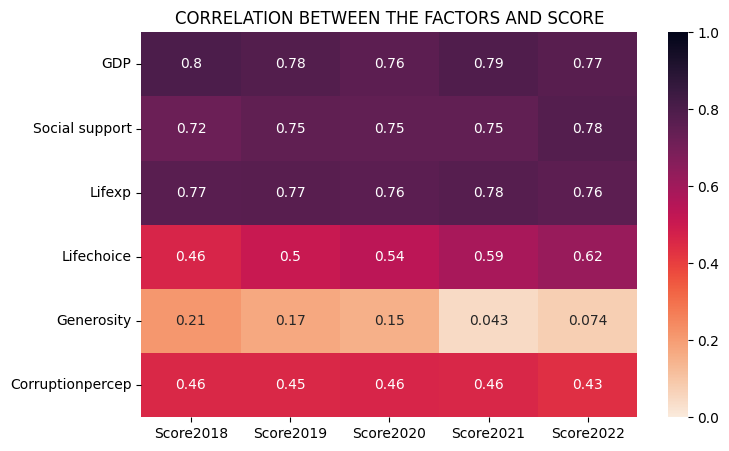

In [45]:
plt.figure(figsize=(8,5))
pl = sb.heatmap(cor, annot= True, cmap = 'rocket_r', vmin = 0, vmax= 1)
pl.set_title('CORRELATION BETWEEN THE FACTORS AND SCORE')


Every Factor has positive relationship with Happiness Score.

GDP is highly correlated with Happiness score followed by Life Expectency.

The correlation between Generosity and Happiness index score is lesser than other factors.

### Top 5:

In [46]:
top5 = pd.DataFrame({'Rank' : [1,2,3,4,5], 'Top5in2018': h18['Country'].head(5), 'Top5in2019': h19['Country'].head(5), 'Top5in2020': h20['Country'].head(5), 'Top5in2021': h21['Country'].head(5), 'Top5in2022': h22['Country'].head(5)})
top5

,Rank,Top5in2018,Top5in2019,Top5in2020,Top5in2021,Top5in2022
1,1,Finland,Finland,Finland,Finland,Finland
2,2,Norway,Denmark,Denmark,Denmark,Denmark
3,3,Denmark,Norway,Switzerland,Switzerland,Iceland
4,4,Iceland,Iceland,Iceland,Iceland,Switzerland
5,5,Switzerland,Netherlands,Norway,Netherlands,Netherlands


In [47]:
top = list(top5['Top5in2018'])+list(top5['Top5in2019'])+list(top5['Top5in2020'])+list(top5['Top5in2021'])+list(top5['Top5in2022'])
inall = []
notall = []
for i in top:
    if top.count(i) == 5:
        inall.append(i)
    elif top.count(i) < 5:
        notall.append(i)
print("countries that gets into top 5 in atleast any one of the years are %s" %(list(set(top))))
print("Countries that keeps its position in top 5 in all 5 years are {}".format(list(set(inall))))
print("Countries that weren't in top 5 in all 5 years consecutively are {}".format(list(set(notall))))

        

countries that gets into top 5 in atleast any one of the years are ['Netherlands', 'Iceland', 'Norway', 'Finland', 'Denmark', 'Switzerland']
Countries that keeps its position in top 5 in all 5 years are ['Finland', 'Denmark', 'Iceland']
Countries that weren't in top 5 in all 5 years consecutively are ['Netherlands', 'Norway', 'Switzerland']


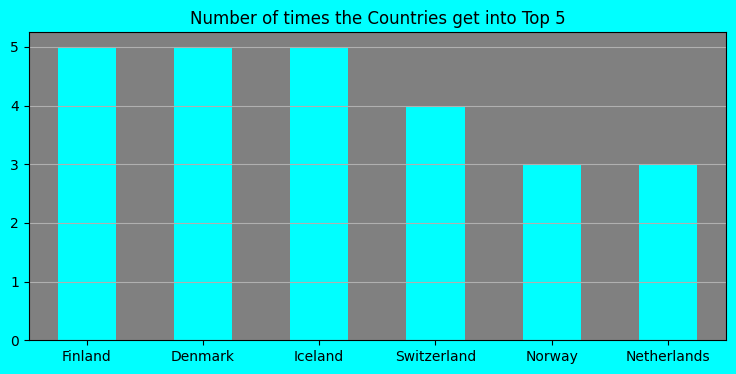

In [48]:
plt.figure(figsize=(9,4), facecolor= 'cyan')
toplt = top5.iloc[0:6,1:6].stack().value_counts().plot(kind ='bar', color ='cyan', rot = 0)
plt.title('Number of times the Countries get into Top 5')
toplt.set_facecolor('grey')
toplt.grid(axis = 'y')

Finland, Denmark, Iceland gets into top 5 in all 5 years. Switzerland, Norway, Netherlands gets into top 5 for more than 2 years.

### Last 5:

In [49]:
worst = pd.DataFrame({'2018': h18['Country'].tail(5), '2019': h19['Country'].tail(5), '2020': h20['Country'].tail(5), '2021': h21['Country'].tail(5), '2022': h22['Country'].tail(5)})
worst

,2018,2019,2020,2021,2022
133,Malawi,Malawi,Botswana,Lesotho,Botswana
134,Liberia,Yemen,Tanzania,Botswana,Rwanda
135,Rwanda,Rwanda,Rwanda,Rwanda,Zimbabwe
136,Yemen,Tanzania,Zimbabwe,Zimbabwe,Lebanon
137,Tanzania,Afghanistan,Afghanistan,Afghanistan,Afghanistan


In [50]:
wor = list(worst['2018'])+list(worst['2019'])+list(worst['2020'])+list(worst['2021'])+list(worst['2022'])
ina = []
nal = []
for i in wor:
    if wor.count(i)== 5:
        ina.append(i)
print("Countries that are consecutively in last five place for 5 years are %s" %list(set(ina)))

Countries that are consecutively in last five place for 5 years are ['Rwanda']


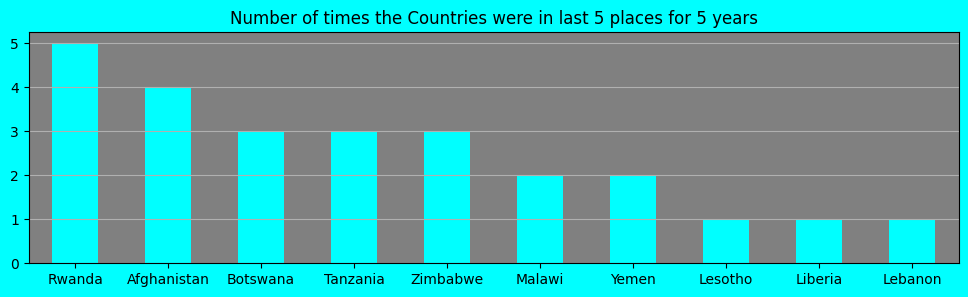

In [51]:
plt.figure(figsize=(12,3), facecolor = 'cyan')
worplt = worst.iloc[0:6,0:6].stack().value_counts().plot(kind ='bar', color ='cyan', rot = 0)
plt.title('Number of times the Countries were in last 5 places for 5 years')
worplt.set_facecolor('grey')
worplt.grid(axis = 'y')

The above countries were in Last 5 places for atleast 1 year. Rwanda is the only country that comes in last 5 places for 5 consecutive years. 

### Happiness score since 2018:

Text(0.5, 1.0, 'Average of World happiness score from 2018 to 2022')

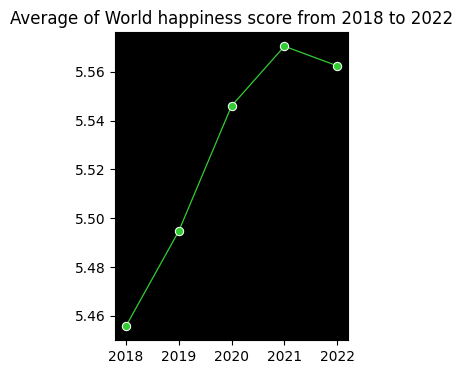

In [53]:
worsco = [h18['Score'].mean(), h19['Score'].mean(), h20['Score'].mean(), h21['Score'].mean(), h22['Score'].mean()]

plt.figure(figsize=(3,4))
ax = sb.lineplot(x = worst.columns, y = worsco, marker ='o', color = 'limegreen', linewidth = 0.9)
ax.set_facecolor('black')
plt.title('Average of World happiness score from 2018 to 2022')

Average of World Happiness Score is steeply rising since 2018 and from 2021 it is decreasing but not that much.

### 6 factors since 2018:

In [54]:
fact18 = h18[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].mean()
fact19 = h19[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].mean()
fact20 = h20[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].mean()
fact21 = h21[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].mean()
fact22 = h22[['GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].mean()
worfac = pd.DataFrame({'2018': fact18, '2019': fact19, '2020': fact20, '2021': fact21, '2022': fact22},index = h18.columns[3:9])
worldfactors = worfac.transpose()

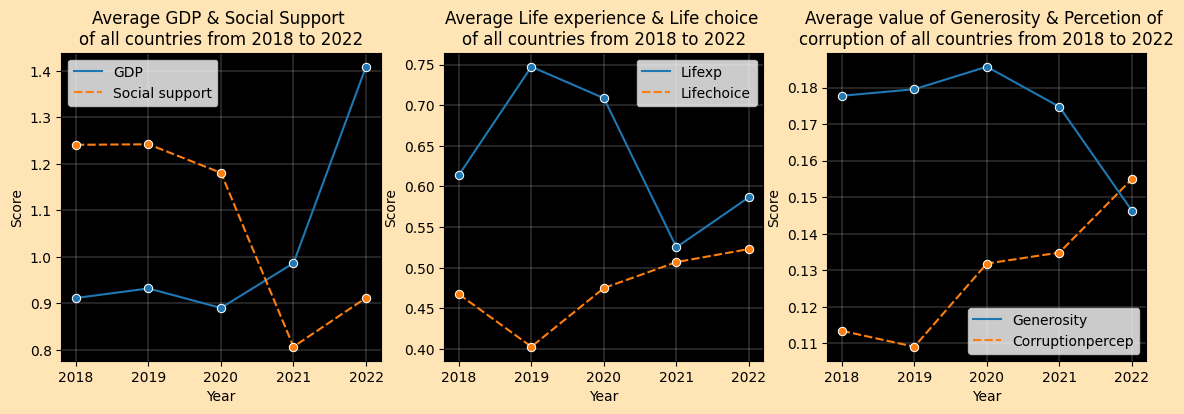

In [55]:
plt.figure(figsize=(14,4), facecolor = 'moccasin')
plt.subplot(131)
ax = sb.lineplot(worldfactors[['GDP', 'Social support']], marker= 'o')
ax.set_facecolor('k')
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Average GDP & Social Support \nof all countries from 2018 to 2022')
plt.grid(linewidth = 0.3)

plt.subplot(132)
ax1 = sb.lineplot(worldfactors[['Lifexp', 'Lifechoice']], marker= 'o')
ax1.set_facecolor('black')
plt.title('Average Life experience & Life choice \nof all countries from 2018 to 2022')
plt.legend(loc= 'upper right')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(linewidth = 0.3)

plt.subplot(133)
ax2 = sb.lineplot(worldfactors[['Generosity', 'Corruptionpercep']], marker= 'o')
ax2.set_facecolor('black')
plt.title('Average value of Generosity & Percetion of \ncorruption of all countries from 2018 to 2022')
plt.legend(loc= 'lower right')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(linewidth = 0.3)

GDP per capita and Perception of Corruption averages are rising since 2018.

However, almost all the factors resembles a roller-coaster pattern.

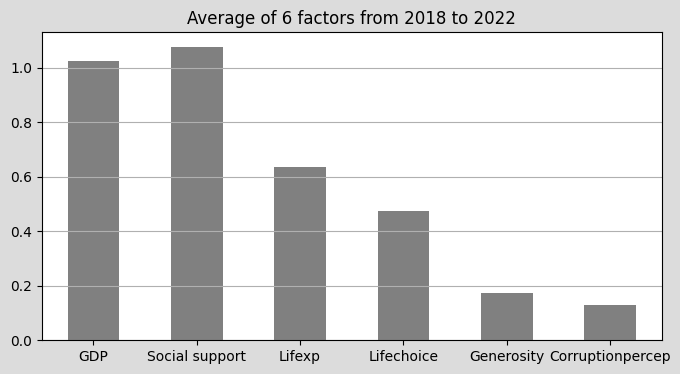

In [56]:
plt.figure(figsize = (8,4), facecolor = 'gainsboro')
worldfactors.mean().plot(kind= 'bar', rot= 0, color = 'grey')
plt.title('Average of 6 factors from 2018 to 2022')
plt.grid(axis = 'y')

From 2018 to 2022, On average, Social Support score is higher followed by GDP, Life Expectency and 2 other factors. 

Perception of Corruption score is lower than others.

### Countries that are significantly developed in Happiness in 5 years:

In [57]:
as18 = h18.sort_values(by = 'Country', ascending = True)
as19 = h19.sort_values(by = 'Country', ascending = True)
as20 = h20.sort_values(by = 'Country', ascending = True)
as21 = h21.sort_values(by = 'Country', ascending = True)
as22 = h22.sort_values(by = 'Country', ascending = True)

In [58]:
coandsco = pd.DataFrame({'Country': list(as18['Country']), 
                         '2018': list(as18['Score']),
                         '2019': list(as19['Score']),
                         '2020': list(as20['Score']),
                         '2021': list(as21['Score']),
                         '2022': list(as22['Score']) })
coandsco

,Country,2018,2019,2020,2021,2022
0,Afghanistan,3.632,3.203,2.5669,2.523,2.404
1,Albania,4.586,4.719,4.8827,5.117,5.199
2,Algeria,5.295,5.211,5.0051,4.887,5.122
3,Argentina,6.388,6.086,5.9747,5.929,5.967
4,Armenia,4.321,4.559,4.6768,5.283,5.399
...,...,...,...,...,...,...
132,Venezuela,4.806,4.707,5.0532,4.892,4.925
133,Vietnam,5.103,5.175,5.3535,5.411,5.485
134,Yemen,3.355,3.380,3.5274,3.658,4.197
135,Zambia,4.377,4.107,3.7594,4.073,3.760


In [59]:
import statistics

In [60]:
stdevcon = []
conlis = []
for i in coandsco.Country:
    lst = list(coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']==i].sum())
    stdevcon.append(statistics.stdev(lst))
    conlis.append(i)
    
conscon = pd.Series(data = stdevcon, index = conlis) 
print("Country that has been consistent in their score since 2018 is %s." %conscon[conscon == conscon.min()].index[0])
print("Country that has been significantly deviated Happiness score since 2018 is %s." %conscon[conscon == conscon.max()].index[0])

Country that has been consistent in their score since 2018 is Azerbaijan.
Country that has been significantly deviated Happiness score since 2018 is Lebanon.


In [61]:
def cusvar(l, mean):
    out = []
    for i in range(0,len(l)-1):
        c = l[i]-mean
        out.append(c)
    return sum(out) 

conlis = []
scolis = []
for i in coandsco.Country:
    lst = list(coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']==i].sum())
    scolis.append(cusvar(lst, statistics.mean(lst)))
    conlis.append(i)
    
devcon = pd.Series(data = scolis, index = conlis)
print("Country that have significantly developed Happiness score since 2018 is %s" %devcon[devcon == devcon.min()].index[0])
print("Country that have declining Happiness score since 2018 is %s" %devcon[devcon == devcon.max()].index[0])

Country that have significantly developed Happiness score since 2018 is Liberia
Country that have declining Happiness score since 2018 is Lebanon


Text(0.5, 1.0, 'Lebanon(declining)')

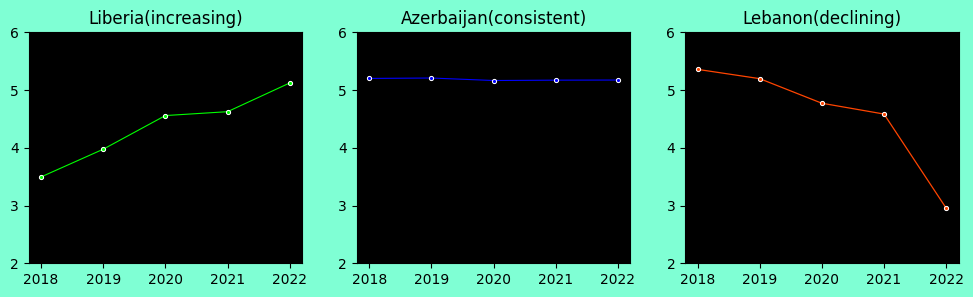

In [62]:
plt.figure(figsize=(12,3), facecolor = 'aquamarine')

plt.subplot(1,3,1).set_facecolor('black')
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Liberia'].sum(), color = 'lime', marker = '.', markeredgecolor = 'white',linewidth = 0.8)
plt.yticks([i for i in range(2,7)])
plt.title('Liberia(increasing)')

plt.subplot(1,3,2).set_facecolor('black')
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Azerbaijan'].sum(), color = 'blue', marker = '.', markeredgecolor = 'white', linewidth = 0.8)
plt.yticks([i for i in range(2,7)])
plt.title('Azerbaijan(consistent)')

plt.subplot(1,3,3).set_facecolor('black')
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Lebanon'].sum(), color = 'orangered', marker = '.', markeredgecolor = 'white', linewidth = 0.9)
plt.yticks([i for i in range(2,7)])
plt.title('Lebanon(declining)')


Liberia's score is significantly increasing since 2018.

Azerbaijan's score is consistent since 2018.

Lebanon score is declining since 2018.

### Commonality among the 5 countries whose scores were significantly increasing from 2018:

In [63]:
devcon.sort_values().head()

Liberia   -0.76702
Yemen     -0.57352
Armenia   -0.55124
Ukraine   -0.49306
Croatia   -0.47206
dtype: float64

Text(0.5, 1.0, 'Croatia')

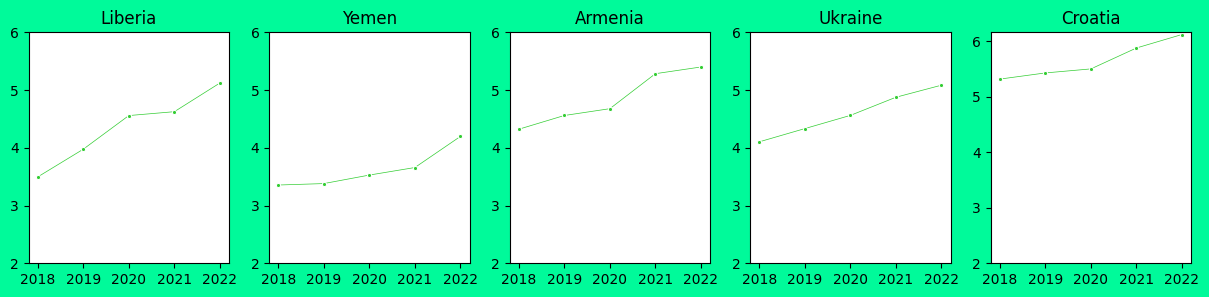

In [64]:
plt.figure(figsize=(15,3), facecolor = 'mediumspringgreen')

plt.subplot(1,5,1)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Liberia'].sum(), color = 'limegreen', marker = '.', markeredgecolor = 'white',linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Liberia')

plt.subplot(1,5,2)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Yemen'].sum(), color = 'limegreen', marker = '.', markeredgecolor = 'white', linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Yemen')

plt.subplot(1,5,3)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Armenia'].sum(), color = 'limegreen', marker = '.', markeredgecolor = 'white', linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Armenia')

plt.subplot(1,5,4)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Ukraine'].sum(), color = 'limegreen', marker = '.', markeredgecolor = 'white',linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Ukraine')

plt.subplot(1,5,5)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Croatia'].sum(), color = 'limegreen', marker = '.', markeredgecolor = 'white', linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Croatia')


All the countries scores are sloping upwards.

In [65]:
h18[h18['Country'] =='Liberia']
h19[h19['Country'] =='Liberia']
h20[h20['Country'] =='Liberia']
h21[h21['Country'] =='Liberia']
h22[h22['Country'] =='Liberia']
lib = h18[h18['Country'] =='Liberia'].append(h19[h19['Country'] =='Liberia']).append(h20[h20['Country'] =='Liberia']).append(h21[h21['Country'] =='Liberia']).append(h22[h22['Country'] =='Liberia'])

In [66]:
h18[h18['Country'] =='Yemen']
h19[h19['Country'] =='Yemen']
h20[h20['Country'] =='Yemen']
h21[h21['Country'] =='Yemen']
h22[h22['Country'] =='Yemen']
yem = h18[h18['Country'] =='Yemen'].append(h19[h19['Country'] =='Yemen']).append(h20[h20['Country'] =='Yemen']).append(h21[h21['Country'] =='Yemen']).append(h22[h22['Country'] =='Yemen'])

In [67]:
h18[h18['Country'] =='Armenia']
h19[h19['Country'] =='Armenia']
h20[h20['Country'] =='Armenia']
h21[h21['Country'] =='Armenia']
h22[h22['Country'] =='Armenia']
arm = h18[h18['Country'] =='Armenia'].append(h19[h19['Country'] =='Armenia']).append(h20[h20['Country'] =='Armenia']).append(h21[h21['Country'] =='Armenia']).append(h22[h22['Country'] =='Armenia'])


In [68]:
h18[h18['Country'] =='Ukraine']
h19[h19['Country'] =='Ukraine']
h20[h20['Country'] =='Ukraine']
h21[h21['Country'] =='Ukraine']
h22[h22['Country'] =='Ukraine']
ukr = h18[h18['Country'] =='Ukraine'].append(h19[h19['Country'] =='Ukraine']).append(h20[h20['Country'] =='Ukraine']).append(h21[h21['Country'] =='Ukraine']).append(h22[h22['Country'] =='Ukraine'])


In [69]:
h18[h18['Country'] =='Croatia']
h19[h19['Country'] =='Croatia']
h20[h20['Country'] =='Croatia']
h21[h21['Country'] =='Croatia']
h22[h22['Country'] =='Croatia']
cro = h18[h18['Country'] =='Croatia'].append(h19[h19['Country'] =='Croatia']).append(h20[h20['Country'] =='Croatia']).append(h21[h21['Country'] =='Croatia']).append(h22[h22['Country'] =='Croatia'])

In [70]:
libme = lib.describe().iloc[1, 2:].sort_values(ascending = False)
yemme = yem.describe().iloc[1, 2:].sort_values(ascending = False)
armme = arm.describe().iloc[1, 2:].sort_values(ascending = False)
ukrme = ukr.describe().iloc[1, 2:].sort_values(ascending = False)
crome = cro.describe().iloc[1, 2:].sort_values(ascending = False)

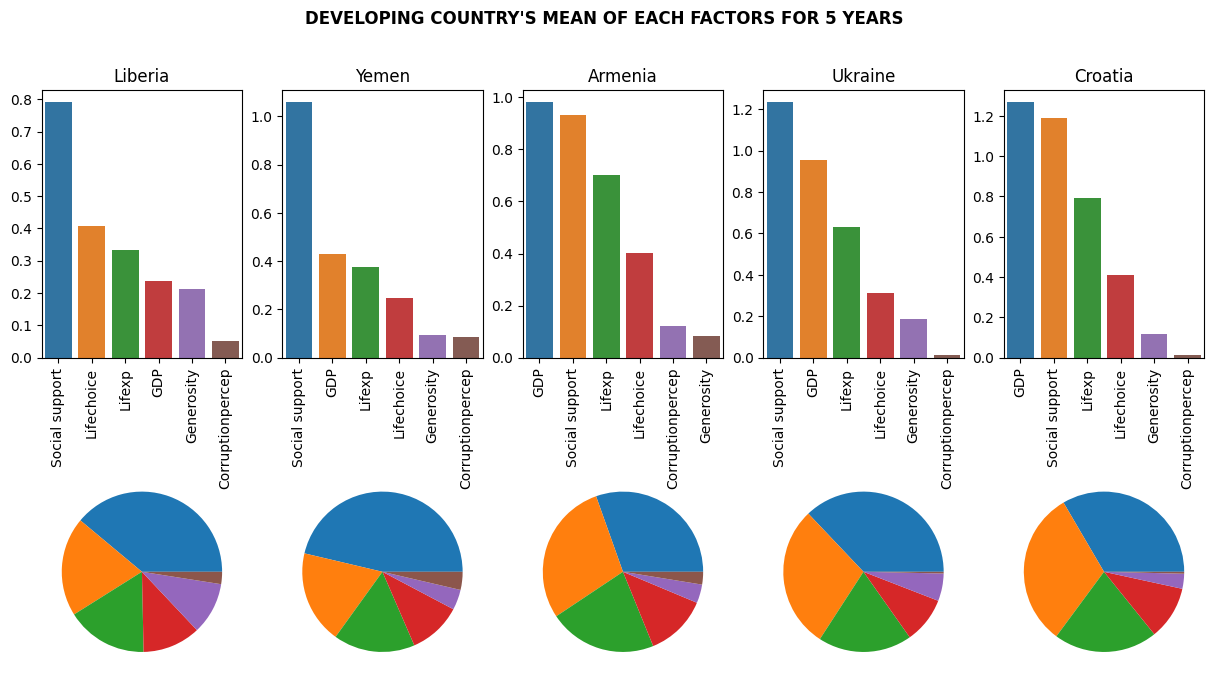

In [71]:
fig,axs = plt.subplots(2,5, figsize=(15,8))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle("DEVELOPING COUNTRY'S MEAN OF EACH FACTORS FOR 5 YEARS", fontweight = 'bold')
sb.barplot(ax= axs[0,0], x = libme.index, y = libme.values).set_title('Liberia')
axs[0,0].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,1], x = yemme.index, y = yemme.values).set_title('Yemen')
axs[0,1].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,2], x = armme.index, y = armme.values).set_title('Armenia')
axs[0,2].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,3], x = ukrme.index, y = ukrme.values).set_title('Ukraine')
axs[0,3].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,4], x = crome.index, y = crome.values).set_title('Croatia')
axs[0,4].tick_params('x', rotation = 90)

plt.subplot(256)
plt.pie(x = libme.values)
plt.subplot(257)
plt.pie(x = yemme.values)
plt.subplot(258)
plt.pie(x = armme.values)
plt.subplot(259)
plt.pie(x = ukrme.values)
plt.subplot(2,5,10)
plt.pie(x = crome.values)

plt.show()

Out of 5 countries whose scores are increasing, 3 countries has higher Social Support and 2 countries has higher GDP.

Text(0.5, 1.0, 'Croatia')

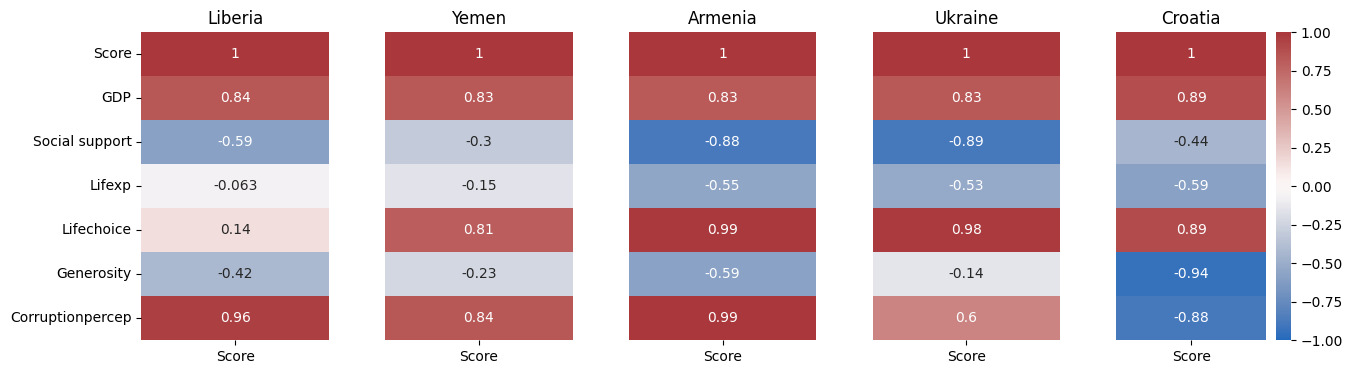

In [72]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace = 0.3)

plt.subplot(151)
sb.heatmap(lib[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.title('Liberia')

plt.subplot(152)
sb.heatmap(yem[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.yticks([])
plt.title('Yemen')

plt.subplot(153)
sb.heatmap(arm[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.yticks([])
plt.title('Armenia')

plt.subplot(154)
sb.heatmap(ukr[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.yticks([])
plt.title('Ukraine')

plt.subplot(155)
sb.heatmap(cro[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag',)
plt.yticks([])
plt.title('Croatia')

GDP is positively correlated with those countries whose Happiness scores are increasing significantly from 2018.

Not that strong, but there is a negative correlation between Social Support and Happiness scores of those countries indicating that the Social support is decreasing in a decreasing rate with increase in Happiness score from 2018.

###  Commonality among the countries whose scores were declining since 2018:

In [73]:
devcon.sort_values(ascending = False).head()

Lebanon         1.61810
Pakistan        0.73766
Jordan          0.49748
Sierra Leone    0.48488
Afghanistan     0.46178
dtype: float64

Text(0.5, 1.0, 'Afghanistan')

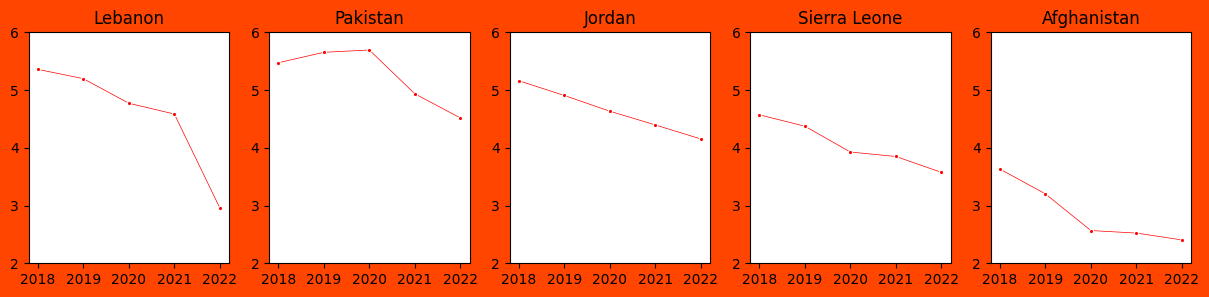

In [74]:
plt.figure(figsize=(15,3), facecolor = 'orangered')

plt.subplot(1,5,1)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Lebanon'].sum(), color = 'r', marker = '.', markeredgecolor = 'white',linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Lebanon')

plt.subplot(1,5,2)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Pakistan'].sum(), color = 'r', marker = '.', markeredgecolor = 'white', linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Pakistan')

plt.subplot(1,5,3)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Jordan'].sum(), color = 'red', marker = '.', markeredgecolor = 'white', linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Jordan')

plt.subplot(1,5,4)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Sierra Leone'].sum(), color = 'r', marker = '.', markeredgecolor = 'white',linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Sierra Leone')

plt.subplot(1,5,5)
sb.lineplot(data = coandsco[['2018', '2019', '2020', '2021', '2022']][coandsco['Country']=='Afghanistan'].sum(), color = 'r', marker = '.', markeredgecolor = 'white', linewidth = 0.5)
plt.yticks([i for i in range(2,7)])
plt.title('Afghanistan')


The above countries Happiness scores are downwards sloping.

In [75]:
h18[h18['Country'] =='Lebanon']
h19[h19['Country'] =='Lebanon']
h20[h20['Country'] =='Lebanon']
h21[h21['Country'] =='Lebanon']
h22[h22['Country'] =='Lebanon']
leb = h18[h18['Country'] =='Lebanon'].append(h19[h19['Country'] =='Lebanon']).append(h20[h20['Country'] =='Lebanon']).append(h21[h21['Country'] =='Lebanon']).append(h22[h22['Country'] =='Lebanon'])


In [76]:
h18[h18['Country'] =='Pakistan']
h19[h19['Country'] =='Pakistan']
h20[h20['Country'] =='Pakistan']
h21[h21['Country'] =='Pakistan']
h22[h22['Country'] =='Pakistan']
pak = h18[h18['Country'] =='Pakistan'].append(h19[h19['Country'] =='Pakistan']).append(h20[h20['Country'] =='Pakistan']).append(h21[h21['Country'] =='Pakistan']).append(h22[h22['Country'] =='Pakistan'])


In [77]:
h18[h18['Country'] =='Jordan']
h19[h19['Country'] =='Jordan']
h20[h20['Country'] =='Jordan']
h21[h21['Country'] =='Jordan']
h22[h22['Country'] =='Jordan']
jor = h18[h18['Country'] =='Jordan'].append(h19[h19['Country'] =='Jordan']).append(h20[h20['Country'] =='Jordan']).append(h21[h21['Country'] =='Jordan']).append(h22[h22['Country'] =='Jordan'])


In [78]:
h18[h18['Country'] =='Sierra Leone']
h19[h19['Country'] =='Sierra Leone']
h20[h20['Country'] =='Sierra Leone']
h21[h21['Country'] =='Sierra Leone']
h22[h22['Country'] =='Sierra Leone']
sil = h18[h18['Country'] =='Sierra Leone'].append(h19[h19['Country'] =='Sierra Leone']).append(h20[h20['Country'] =='Sierra Leone']).append(h21[h21['Country'] =='Sierra Leone']).append(h22[h22['Country'] =='Sierra Leone'])


In [79]:
h18[h18['Country'] =='Afghanistan']
h19[h19['Country'] =='Afghanistan']
h20[h20['Country'] =='Afghanistan']
h21[h21['Country'] =='Afghanistan']
h22[h22['Country'] =='Afghanistan']
afg = h18[h18['Country'] =='Afghanistan'].append(h19[h19['Country'] =='Afghanistan']).append(h20[h20['Country'] =='Afghanistan']).append(h21[h21['Country'] =='Afghanistan']).append(h22[h22['Country'] =='Afghanistan'])


In [80]:
lebme = leb.describe().iloc[1, 2:].sort_values()
pakme = pak.describe().iloc[1, 2:].sort_values()
jorme = jor.describe().iloc[1, 2:].sort_values()
silme = sil.describe().iloc[1, 2:].sort_values()
afgme = afg.describe().iloc[1, 2:].sort_values()

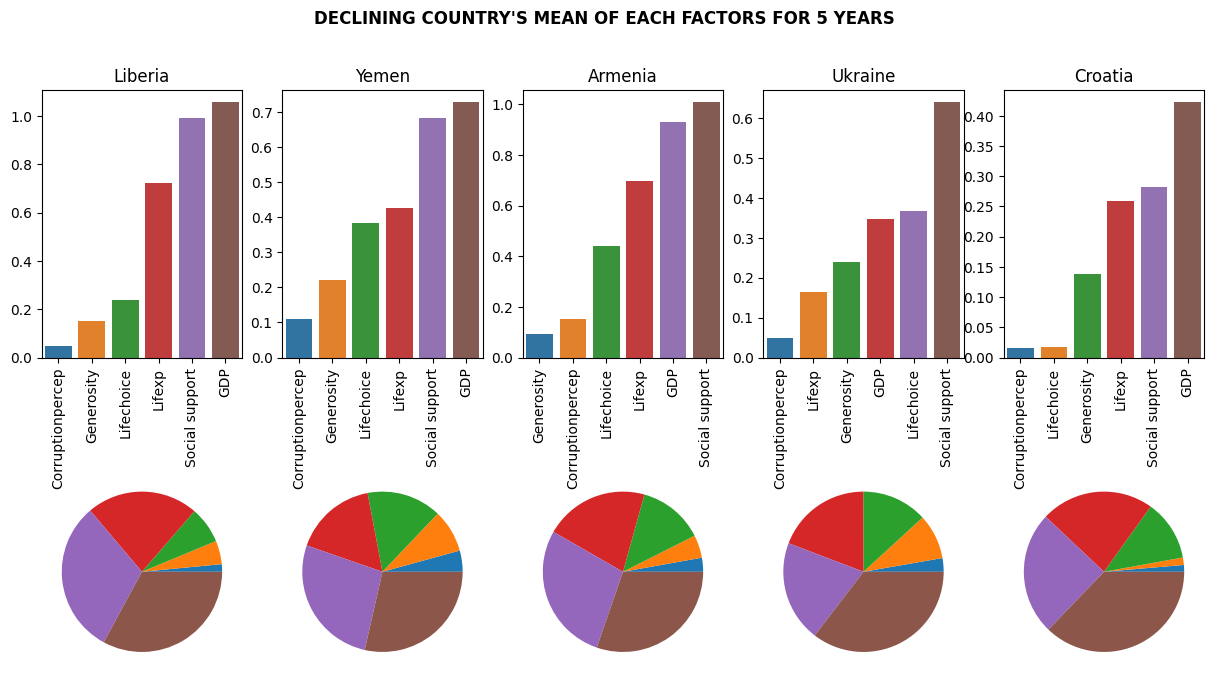

In [81]:
fig,axs = plt.subplots(2,5, figsize=(15,8))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle("DECLINING COUNTRY'S MEAN OF EACH FACTORS FOR 5 YEARS", fontweight = 'bold')
sb.barplot(ax= axs[0,0], x = lebme.index, y = lebme.values).set_title('Liberia')
axs[0,0].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,1], x = pakme.index, y = pakme.values).set_title('Yemen')
axs[0,1].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,2], x = jorme.index, y = jorme.values).set_title('Armenia')
axs[0,2].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,3], x = silme.index, y = silme.values).set_title('Ukraine')
axs[0,3].tick_params('x', rotation = 90)
sb.barplot(ax= axs[0,4], x = afgme.index, y = afgme.values).set_title('Croatia')
axs[0,4].tick_params('x', rotation = 90)

plt.subplot(256)
plt.pie(x = lebme.values)
plt.subplot(257)
plt.pie(x = pakme.values)
plt.subplot(258)
plt.pie(x = jorme.values)
plt.subplot(259)
plt.pie(x = silme.values)
plt.subplot(2,5,10)
plt.pie(x = afgme.values)

plt.show()

Out of 5 countries whose scores are declining, 4 countries has lower Perception of Corruption and 1 country have lower Generosity.

Text(0.5, 1.0, 'Afghanistan')

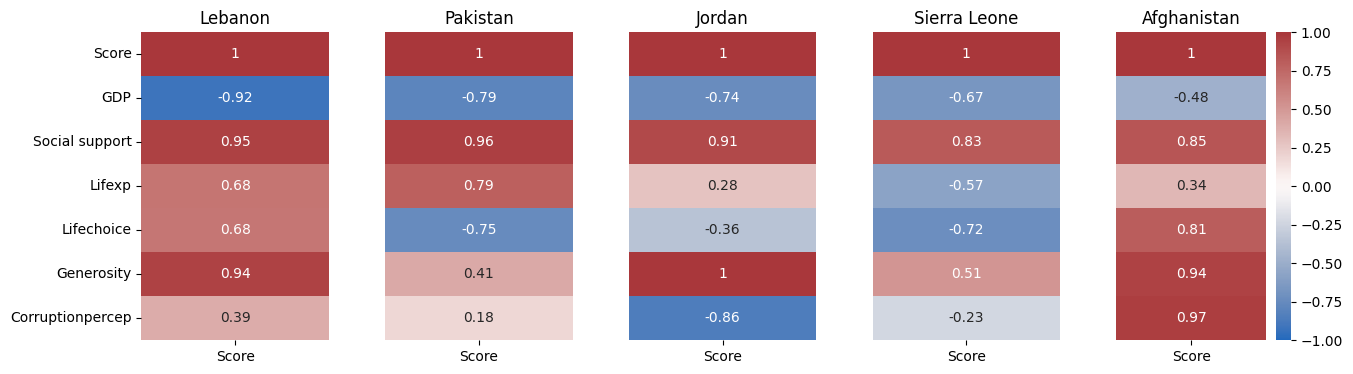

In [82]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace = 0.3)

plt.subplot(151)
sb.heatmap(leb[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.title('Lebanon')

plt.subplot(152)
sb.heatmap(pak[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.yticks([])
plt.title('Pakistan')

plt.subplot(153)
sb.heatmap(jor[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.yticks([])
plt.title('Jordan')

plt.subplot(154)
sb.heatmap(sil[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag', cbar = False)
plt.yticks([])
plt.title('Sierra Leone')

plt.subplot(155)
sb.heatmap(afg[['Score', 'GDP', 'Social support', 'Lifexp', 'Lifechoice', 'Generosity', 'Corruptionpercep']].corr().iloc[:,0:1], annot = True, vmin = -1, vmax= 1,cmap = 'vlag',)
plt.yticks([])
plt.title('Afghanistan')

From the above plot, Social Support has highest positive correlation with scores of all the countries indicating that the Happiness score decreases and Social Support also decreases in all those countries whose scores are declining since 2018.

There is a considerable negative correlation between GDP and Happiness score. Though Happiness scores decreses in those countries, the GDP of those countries increasing to some extent. 

### Commonality among the top consistent countries:

In [83]:
h18[h18['Country'] =='Finland']
h19[h19['Country'] =='Finland']
h20[h20['Country'] =='Finland']
h21[h21['Country'] =='Finland']
h22[h22['Country'] =='Finland']
fin = h18[h18['Country'] =='Finland'].append(h19[h19['Country'] =='Finland']).append(h20[h20['Country'] =='Finland']).append(h21[h21['Country'] =='Finland']).append(h22[h22['Country'] =='Finland'])

In [84]:
h18[h18['Country'] =='Denmark']
h19[h19['Country'] =='Denmark']
h20[h20['Country'] =='Denmark']
h21[h21['Country'] =='Denmark']
h22[h22['Country'] =='Denmark']
den = h18[h18['Country'] =='Denmark'].append(h19[h19['Country'] =='Denmark']).append(h20[h20['Country'] =='Denmark']).append(h21[h21['Country'] =='Denmark']).append(h22[h22['Country'] =='Denmark'])

In [85]:
h18[h18['Country'] =='Iceland']
h19[h19['Country'] =='Iceland']
h20[h20['Country'] =='Iceland']
h21[h21['Country'] =='Iceland']
h22[h22['Country'] =='Iceland']
ice = h18[h18['Country'] =='Iceland'].append(h19[h19['Country'] =='Iceland']).append(h20[h20['Country'] =='Iceland']).append(h21[h21['Country'] =='Iceland']).append(h22[h22['Country'] =='Iceland'])

In [86]:
finme = fin.describe().iloc[1, 2:].sort_values(ascending = False)
denme = den.describe().iloc[1, 2:].sort_values(ascending = False)
iceme = ice.describe().iloc[1, 2:].sort_values(ascending = False)
iceme

GDP                 1.493500
Social support      1.461513
Lifexp              0.903169
Lifechoice          0.669196
Generosity          0.326466
Corruptionpercep    0.152308
Name: mean, dtype: float64

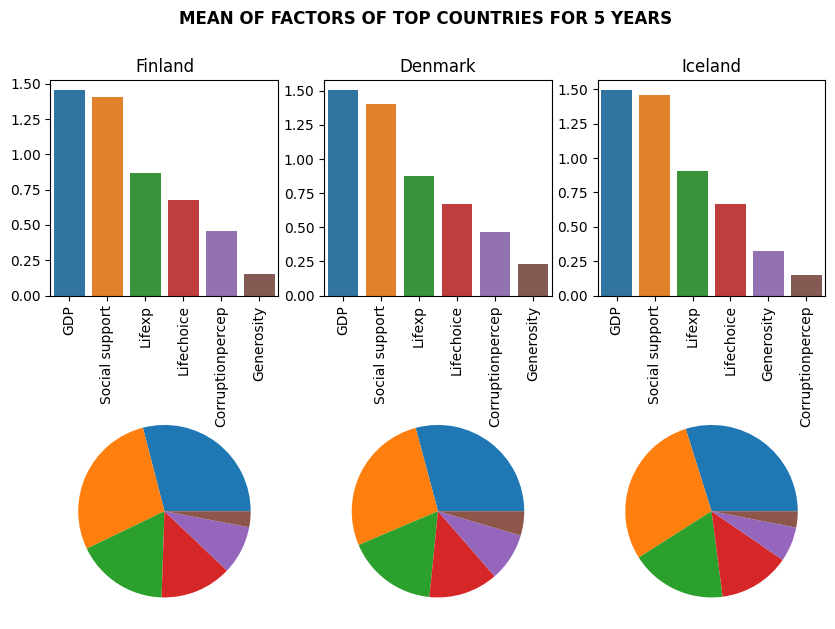

In [87]:
plt.figure(figsize = (10,7))
plt.subplots_adjust(hspace = 0.5)
plt.suptitle('MEAN OF FACTORS OF TOP COUNTRIES FOR 5 YEARS', fontweight = 'bold')

plt.subplot(231)
sb.barplot(x = finme.index, y = finme.values)
plt.xticks(rotation = 90)
plt.title('Finland')

plt.subplot(232)
sb.barplot(x = denme.index, y = denme.values)
plt.xticks(rotation = 90)
plt.title('Denmark')

plt.subplot(233)
sb.barplot(x = iceme.index, y = iceme.values)
plt.xticks(rotation = 90)
plt.title('Iceland')

plt.subplot(234)
plt.pie(x = finme.values)

plt.subplot(235)
plt.pie(x = denme.values)

plt.subplot(236)
plt.pie(x = iceme.values)

plt.show()

All the countries who has been in top 5 place for 5 years have their GDP higher.

### India in happiness index:

In [88]:
indi = pd.DataFrame({ 
                    '2018': list(h18[h18.iloc[:,1]=='India'].transpose().iloc[:,0]),
                    '2019': list(h19[h19.iloc[:,1]=='India'].transpose().iloc[:,0]),
                    '2020': list(h20[h20.iloc[:,1]=='India'].transpose().iloc[:,0]),
                    '2021': list(h21[h21.iloc[:,1]=='India'].transpose().iloc[:,0]),
                    '2022': list(h22[h22.iloc[:,1]=='India'].transpose().iloc[:,0])}, index = list(h18.columns))
ind = indi.transpose()
ind.drop(['Country'], axis =1, inplace = True)

In [89]:
india = ind.convert_dtypes()
india

,Rank,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
2018,133,4.19,0.721,0.747,0.485,0.539,0.172,0.093
2019,140,4.015,0.755,0.765,0.588,0.498,0.2,0.085
2020,144,3.5733,0.730576,0.644199,0.54057,0.581142,0.237072,0.105588
2021,139,3.819,0.741,0.316,0.383,0.622,0.246,0.106
2022,136,3.777,1.167,0.376,0.471,0.647,0.198,0.123


In [90]:
print("India has it's best place in the year %s"
      " by securing %srd place among the countries."
      %(list(ind[ind['Rank']== ind['Rank'].min()].index).pop(), ind['Rank'].min()))

India has it's best place in the year 2018 by securing 133rd place among the countries.


In [91]:
print("India has it's lowest performance in the year %s"
      " at %sth place among the countries."
      %(list(ind[ind['Rank']== ind['Rank'].max()].index).pop(), ind['Rank'].max()))

India has it's lowest performance in the year 2020 at 144th place among the countries.


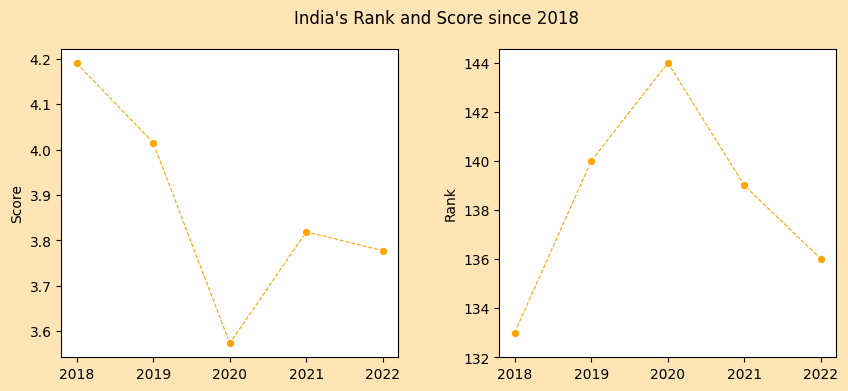

In [92]:
plt.figure(figsize = (10,4), facecolor = 'moccasin')
plt.suptitle("India's Rank and Score since 2018")
plt.subplots_adjust(wspace = 0.3)
plt.subplot(121)
insco = sb.lineplot(india.Score, marker = 'o', color = 'orange', linewidth = '0.8', linestyle = '--')

plt.subplot(122)
inra = sb.lineplot(india.Rank, marker = 'o', color = 'orange', linewidth = '0.8', linestyle = '--')
plt.yticks([i for i in range(132, 145, 2)])
plt.show()

India secured highest score and Rank in the year 2018 since 2018.

India has its lowest score and Rank in the year 2020 since 2018.

### India in 2018(Highest score) vs India in 2020(Lowest score):

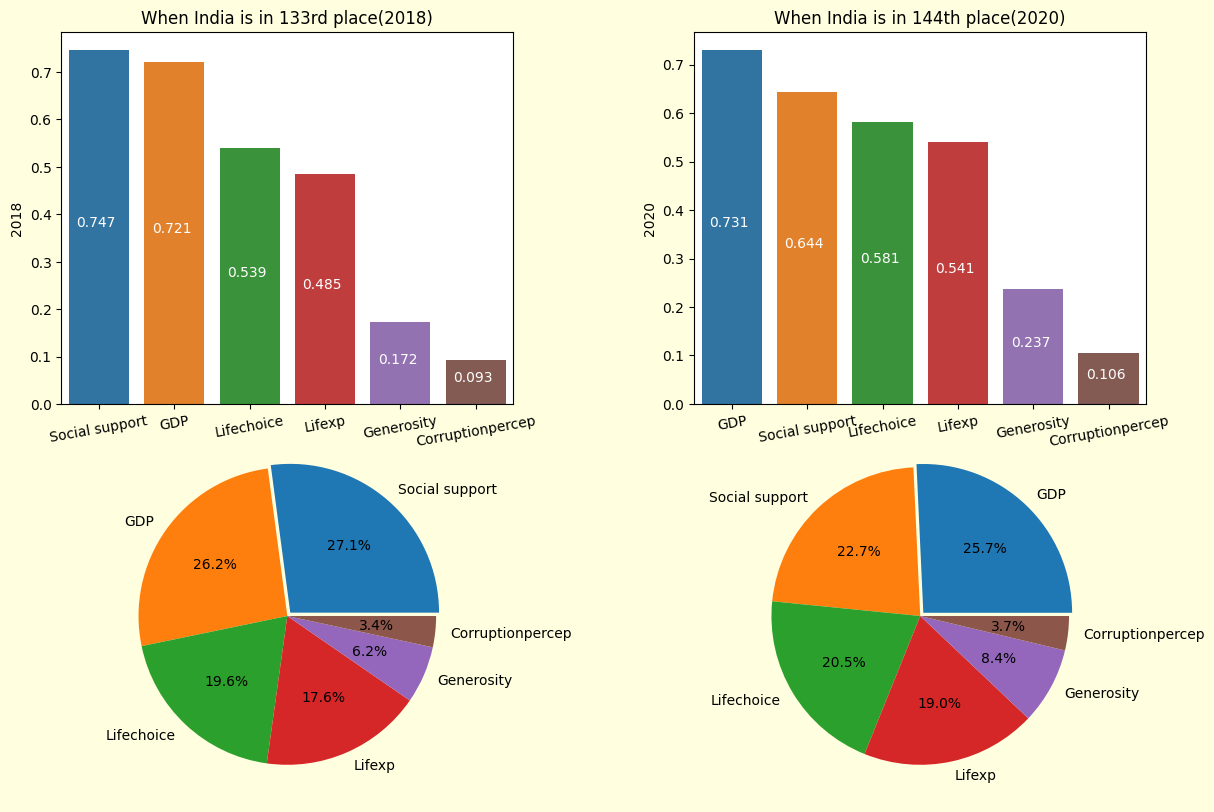

In [93]:

plt.figure(figsize=(14,10), facecolor = 'lightyellow')
plt.subplots_adjust(wspace = 0.4, hspace = 0.07)
plt.subplot(221)
r133 = sb.barplot(y = india.iloc[0, 2:].sort_values(ascending = False), x = india.iloc[0, 2:].sort_values(ascending = False).index)
for i in r133.patches:
    r133.text(i.get_x()+0.1, i.get_height()/2, str(i.get_height()), color = 'white')
plt.xticks(rotation = 10)
plt.title('When India is in 133rd place(2018)')

plt.subplot(223)
plt.pie(india.iloc[0, 2:].sort_values(ascending = False), labels = india.iloc[0, 2:].sort_values(ascending = False).index, explode = [0.03,0,0,0,0,0], autopct = '%1.1f%%')

plt.subplot(222)
r144 = sb.barplot(y = india.iloc[2, 2:].sort_values(ascending = False), x = india.iloc[2, 2:].sort_values(ascending = False).index)
for i in r144.patches:
    r144.text(i.get_x()+0.1, i.get_height()/2, str(round(i.get_height(), 3)), color = 'white')
plt.xticks(rotation = 10)
plt.title('When India is in 144th place(2020)')

plt.subplot(224)
plt.pie(india.iloc[2, 2:].sort_values(ascending = False), labels = india.iloc[2, 2:].sort_values(ascending = False).index, explode = [0.03,0,0,0,0,0], autopct = '%1.1f%%')

plt.show()


When India is in 133rd place, its Social Support stands high.

When India is in 144th place, its GDP stands high.

### India' best:

In [94]:
india

,Rank,Score,GDP,Social support,Lifexp,Lifechoice,Generosity,Corruptionpercep
2018,133,4.19,0.721,0.747,0.485,0.539,0.172,0.093
2019,140,4.015,0.755,0.765,0.588,0.498,0.2,0.085
2020,144,3.5733,0.730576,0.644199,0.54057,0.581142,0.237072,0.105588
2021,139,3.819,0.741,0.316,0.383,0.622,0.246,0.106
2022,136,3.777,1.167,0.376,0.471,0.647,0.198,0.123


In [95]:
tpindia = pd.DataFrame({'Highest GDP': [india.GDP.max(),india[india.GDP == india.GDP.max()].index[0]], 
                         'Highest Social Support': [india['Social support'].max(),india[india['Social support'] == india['Social support'].max()].index[0]],
                         'Highest Life Expectency': [india.Lifexp.max(),india[india.Lifexp == india.Lifexp.max()].index[0]],
                        'Highest Life Choice': [india.Lifechoice.max(),india[india.Lifechoice == india.Lifechoice.max()].index[0]],
                        'Highest Generosity': [india.Generosity.max(),india[india.Generosity == india.Generosity.max()].index[0]],
                        'Highest Perception of Corruption': [india.Corruptionpercep.max(),india[india.Corruptionpercep == india.Corruptionpercep.max()].index[0]]}, 
                    index = ['Score', 'Year'])
topindia = tpindia.T
topindia

,Score,Year
Highest GDP,1.167,2022
Highest Social Support,0.765,2019
Highest Life Expectency,0.588,2019
Highest Life Choice,0.647,2022
Highest Generosity,0.246,2021
Highest Perception of Corruption,0.123,2022


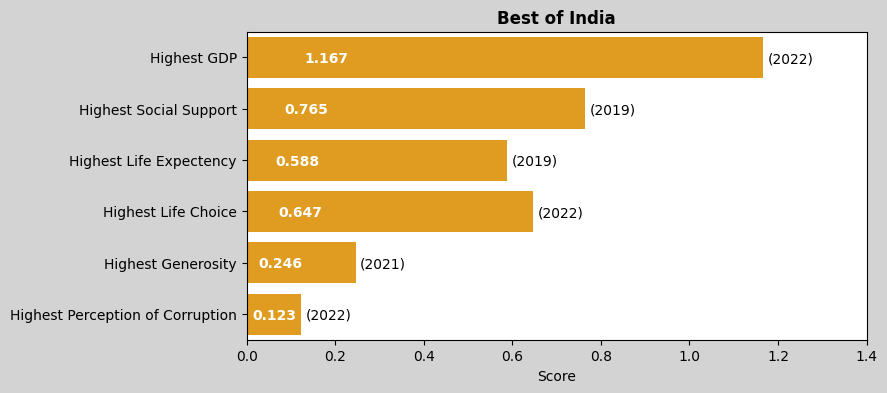

In [96]:
plt.figure(figsize=(8,4), facecolor = 'lightgrey')
tipl=sb.barplot(y = topindia.index, x = topindia.Score, color = 'orange')
plt.xlim(xmax = 1.4)
plt.title('Best of India', fontweight = 'bold')
for i in tipl.patches:
    tipl.text(i.get_width()/9, i.get_y()+0.5, str(i.get_width()), color = 'white', fontweight = 'bold')
for x in tipl.patches:
    tipl.text(x.get_width()+0.01, x.get_y()+0.5, '(%s)'%topindia[topindia.Score == x.get_width()].iloc[0][1])

These are the best of each factor of India since 2018.

Text(0.5, 1.0, 'Mean of 6 factors of India of 5 years')

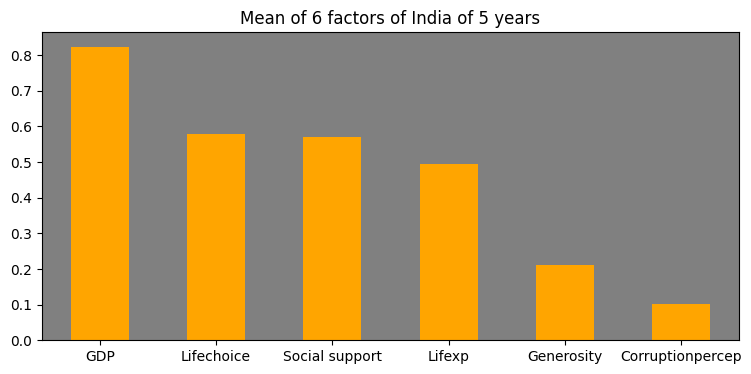

In [97]:
plt.figure(figsize = (9,4))
ax = india.describe().iloc[1,2:8].sort_values(ascending = False).plot(kind = 'bar', color= 'orange',rot = 0)
ax.set_facecolor('grey')
plt.title("Mean of 6 factors of India of 5 years")

In those 5 years, India has its GDP higher than other factors and has its Perception of Corruption lower.

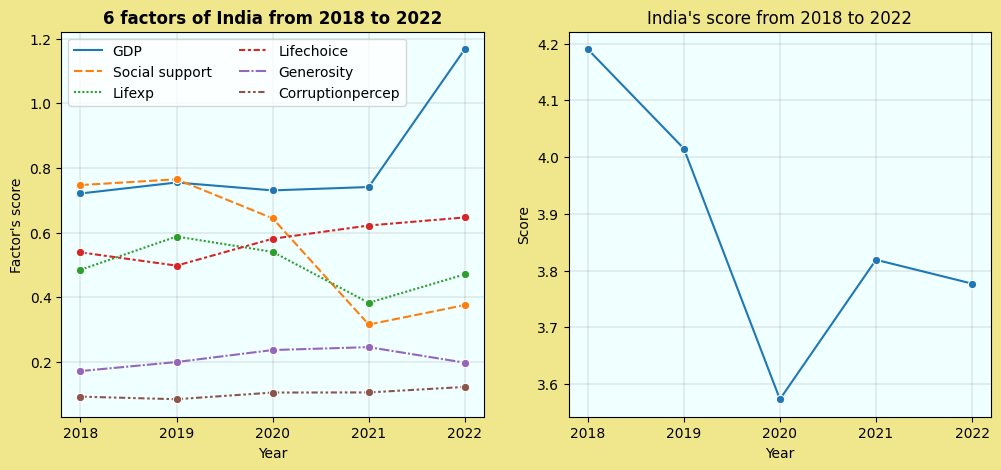

In [98]:
plt.figure(figsize=(12,5), facecolor= 'khaki')

plt.subplot(1,2,1)
ax = sb.lineplot(data = india.drop(['Rank','Score'], axis =1), marker = 'o')
ax.set_facecolor('azure')
plt.legend(loc = 'upper left', ncol = 2)
plt.title('6 factors of India from 2018 to 2022', fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Factor's score")
plt.grid(linewidth = 0.1, color = 'k')

plt.subplot(1,2,2)
ax1 = sb.lineplot(data = india['Score'], marker='o')
ax1.set_facecolor('azure')
plt.title("India's score from 2018 to 2022")
plt.xlabel("Year")
plt.grid(linewidth = 0.1, color = 'k')


The Happiness score roughly appears as downward sloping curve.

Social Support score curve is downward sloping.

GDP score is drastically increased in 2022.

Other factors are less deviated.

#                                                                




















## Conclusion:

### 1) Happiness scores are normally distributed since 2018.
### 2) GDP per capita, Social Support, Life Expectency, Life Choice Freedom distributions are left skewed. Generosity and Perception of Corruption distributions are right skewed.
### 3) Finland, Denmark and Iceland keeps their position in Top 5 since 2018. Finland comes 1st in all 5 years.
### 4) Rwanda is the only country that has been in the last 5 position since 2018.
### 5) Average of World Happiness Score is steeply rising since 2018 and from 2021 it is decreasing.
### 6) GDP per capita and Perception of Corruption total scores are rising since 2018. Other factor's scores are roller-coasting from 2018 to 2022.
### 7) When we sum up all the factors score from 2018 to 2022, Social Support is higher followed by GDP per capita and 4 other factors.
### 8) Liberia have been significantly developing in terms of Happiness score since 2018.
### 9) Azerbaijan have been more consistent with its Happiness score since 2018.
### 10) Lebanon's Happiness score have been declining since 2018.
### 11) Liberia, Yemen, Armenia, Ukraine and Croatia are the 5 countries whose Happiness score has been significantly increasing along with increase in GDP per capita.
### 12) 3 out of 5 countries whose Happiness score has been increasing has Social Support higher than other factors along with increase in GDP per capita.
### 13) Lebanon, Pakistan, Jordan, Sierra Leone and Afghanistan are the 5 countries whose Happiness score has been declining since 2018 along with decrease in Social Support.
### 14) 4 out of 5 countries whose Happiness score has been declining has Perception of Corruption factor lower than other factors.
### 15) Countries that keeps its position in Top 5(Finland, Denmark, Iceland) since 2018 has thier GDP per capita higher than other factors.
### 16) India has it's best place in the year 2018 by securing 133rd Rank.
### 17) India has it's lowest performance in the year 2022 by securing 144th Rank.
### 18) When India is in 133rd place(2018), India has its Social Support higher than other factors and GDP per capita is next to Social Support.
### 19) When India is in 144th place(2020), India has its GDP per capita higher and Social Support is next to GDP per capita.
### 20) India' highest, GDP per capita - 1.167(2022),  Social Support - 0.765(2019), Life Expectency - 0.588(2019), Life Choice - 0.647(2022), Generosity - 0.246(2021), Perception of Corruption - 0.123(2022).
### 21) India have higher GDP per capita(in average) than other factors from 2018 to 2022.
### 22) India's GDP per capita is significantly increasing than other factors especially from 2021. Social Support curve is roughly sloping downwards. Other factors are not that much deviated.

                                                                                                Project by
                                                                                                  Vignesh V G
                                                                                                  vigneshvg100@gmail.com